In [1]:
import pandas as pd
import datetime as dt
import footballData as fd
import numpy as np
import random
import matplotlib.pyplot as plt
import datetime
import time
import Elo as ELO
import seaborn as sns

In [2]:
df1888=pd.read_csv('englandthesis.csv')
startdate=1958
fulldf=df1888[df1888['Season']>=startdate]
fulldf=fulldf.sort_values('Date')
fulldf=fulldf.reset_index()
fulldf=fulldf.replace('Milton Keynes Dons', 'Wimbledon')

def CalendarYear(Date):
    return int(Date.split('-')[0])
CalendarYear(fulldf['Date'][0])
def Month(Date):
    return int(Date.split('-')[1])
fulldf['CalendarYear']=fulldf.apply(lambda row: CalendarYear(row['Date']), axis=1)
fulldf['Month']=fulldf.apply(lambda row: Month(row['Date']), axis=1)
import datetime
from datetime import datetime
def DT(Date):
    return datetime.strptime(Date, '%Y-%m-%d')
fulldf['Date']=fulldf.apply(lambda row: DT(row['Date']), axis=1)

def to_integer(current_time):
    return (current_time-fulldf['Date'][0]).days
fulldf['Day#']=fulldf.apply(lambda row: to_integer(row['Date']), axis=1)
fulldf

import copy
from copy import deepcopy
def g(sigma2, q):
    return 1/np.sqrt(1+3*q**2*sigma2/(np.pi**2))

def E(r, rj, g, Home, HomeAway):
    return 1/(1+10**(-g*(r-rj+HomeAway*Home)/400))

def Res(HomeG, AwayG):
    if(HomeG>AwayG):
        return 1
    elif(AwayG>HomeG):
        return 0
    else:
        return .5
def insideD(g, E):
    return E*(1-E)*(g**2)

def d2(q, dlist):
    if dlist!=0:
        return 1/(q**2*dlist)
    else:
        return 10**10

def ratingupdate(rating, q, d, RD, sums):
    return rating+(q/(1/RD**2+1/d))*sums      
def rdupdate(rd, d):
    return np.sqrt(1/(1/rd**2+1/d))

def timeupdate(c, rd, maxrd):
    return min(np.sqrt(rd**2+c**2), maxrd)

def lik(E, R):
    if(R==1):
        return np.log(E)
    elif (R==.5):
        return np.log(np.sqrt(E*(1-E)))
    elif (R==0):
        return np.log(1-E)

initdictionary={}
initvalues=[1500,1500,1500,1500]
initialrows=[]
Rd=350



/Users/andrewpuopolo/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
initvalues=[1500,1500,1500,1500]
class Teams(object):
    initvalues=[1500,1500,1500,1500]

    def __init__(self, Name, Tier, year):
        self.team=Name
        self.league=Tier
        self.rating=initvalues[Tier-1]
        self.Rd=350
        self.LastMatch=fulldf['Date'][0]
        self.firstseason=year
    def __repr__(self):
        return str(self.team)+', '+str(self.league)+', '+str(self.rating)+', '+str(self.Rd)+', '+str(self.LastMatch)+', '+str(self.firstseason)

In [4]:
clubs=[]
for i in range(len(fulldf['home'].unique())):
    Team=fulldf['home'].unique()[i]
    Teamdf=fulldf[fulldf['home']==Team].reset_index()
    Tier=int(Teamdf['tier'][0])
    Year=Teamdf['Season'][0]
    club=Teams(Team, Tier,Year)
    clubs.append(club)
print(clubs)

[Swindon Town, 3, 1500, 350, 1958-08-23 00:00:00, 1958, Notts County, 3, 1500, 350, 1958-08-23 00:00:00, 1958, Carlisle United, 4, 1500, 350, 1958-08-23 00:00:00, 1958, Bradford Park Avenue, 4, 1500, 350, 1958-08-23 00:00:00, 1958, Cardiff City, 2, 1500, 350, 1958-08-23 00:00:00, 1958, Barrow, 4, 1500, 350, 1958-08-23 00:00:00, 1958, Burnley, 1, 1500, 350, 1958-08-23 00:00:00, 1958, Charlton Athletic, 2, 1500, 350, 1958-08-23 00:00:00, 1958, Fulham, 2, 1500, 350, 1958-08-23 00:00:00, 1958, Tranmere Rovers, 3, 1500, 350, 1958-08-23 00:00:00, 1958, Bolton Wanderers, 1, 1500, 350, 1958-08-23 00:00:00, 1958, Huddersfield Town, 2, 1500, 350, 1958-08-23 00:00:00, 1958, Mansfield Town, 3, 1500, 350, 1958-08-23 00:00:00, 1958, Stockport County, 3, 1500, 350, 1958-08-23 00:00:00, 1958, Leyton Orient, 2, 1500, 350, 1958-08-23 00:00:00, 1958, Lincoln City, 2, 1500, 350, 1958-08-23 00:00:00, 1958, Liverpool, 2, 1500, 350, 1958-08-23 00:00:00, 1958, Middlesbrough, 2, 1500, 350, 1958-08-23 00:00:00,

In [5]:
fulldf

,index,Unnamed: 0,Date,Season,home,visitor,FT,hgoal,vgoal,division,tier,totgoal,goaldif,result,CalendarYear,Month,Day#
0,75629,75630,1958-08-23,1958,Swindon Town,Wrexham,1-0,1,0,3,3,1,1,H,1958,8,0
1,75423,75424,1958-08-23,1958,Notts County,Accrington Stanley,1-1,1,1,3,3,2,0,D,1958,8,0
2,75745,75746,1958-08-23,1958,Carlisle United,Aldershot,1-0,1,0,4,4,1,1,H,1958,8,0
3,75743,75744,1958-08-23,1958,Bradford Park Avenue,Workington,3-2,3,2,4,4,5,1,H,1958,8,0
4,74746,74747,1958-08-23,1958,Cardiff City,Barnsley,0-1,0,1,2,2,1,-1,A,1958,8,0
5,75708,75709,1958-08-23,1958,Barrow,Gateshead,0-3,0,3,4,4,3,-3,A,1958,8,0
6,74337,74338,1958-08-23,1958,Burnley,Manchester City,3-4,3,4,1,1,7,-1,A,1958,8,0
7,74783,74784,1958-08-23,1958,Charlton Athletic,Sheffield United,1-1,1,1,2,2,2,0,D,1958,8,0
8,74827,74828,1958-08-23,1958,Fulham,Stoke City,6-1,6,1,2,2,7,5,H,1958,8,0
9,75637,75638,1958-08-23,1958,Tranmere Rovers,Doncaster Rovers,3-0,3,0,3,3,3,3,H,1958,8,0


In [6]:
def UpdateRatingDev(Rd, Time, tau, maxrd):
    newRd=Rd
    for i in range(Time):
        newRd=min(maxrd, np.sqrt(newRd**2+tau**2))
    return newRd

In [7]:
fulldf['Date'][0]

Timestamp('1958-08-23 00:00:00')

In [8]:

#This needs to be rewritten so we don't have to run it over an dover again
for i in range(len(fulldf['home'].unique())):
    Team=fulldf['home'].unique()[i]
    Teamdf=fulldf[fulldf['home']==Team].reset_index()
    Tier=int(Teamdf['tier'][0])
    LastMatch=fulldf['Day#'][0]
    dcalc=0
    scalc=0
    initialrow=[Team,initvalues[Tier-1], Rd,Tier,  dcalc,scalc ]
    initialrows.append(initialrow)
#Needs to be rewritten to optimize using BuildEloDict Function
for a in range(len(initialrows)):
    initdictionary[initialrows[a][0]]=initialrows[a][1:]
import time
def Glickologlik(params):
    rows2=[]
    ratingperiodlength=7.0
    c=params['c']
    h=80
    hk=params['hk']
    #minrd=params['minrd']
    maxrd=params['maxrd']
    curtime=time.time()
    rows=len(fulldf)
    q=np.log(10)/400
    logliks=0.0
    hburn=10
    startyear=fulldf['Season'].values[0]
    burn=1983-startyear
    startday=fulldf['Season']
    Glickodictionary=copy.deepcopy(initdictionary)
    for key in Glickodictionary:
        Glickodictionary[key][1]=maxrd
    currentyear=fulldf['Season'].values[0]
    startdate=fulldf['Date'][0]
    GameCounter=0.
    Rs=0.
    Es=0.
    totaltime=fulldf['Day#'][rows-1]-fulldf['Day#'][0]
    day=0.
    #print(Glickodictionary)
    year=copy.deepcopy(startyear)
    while day<=totaltime:
        for key in Glickodictionary:
            Glickodictionary[key][1]=timeupdate(c, Glickodictionary[key][1], maxrd)
        ratingperioddf=fulldf[(fulldf['Day#'] >=day) & (fulldf['Day#']<day+ratingperiodlength)].reset_index()
        if len(ratingperioddf!=0):
            Rs=0.
            Es=0.

            for ind, row in ratingperioddf.iterrows():
                #print('sup')
                Home=row['home']
                Away=row['visitor']
                HomeGoals=row['hgoal']
                AwayGoals=row['vgoal']
                year=row['Season']
                date=row['Date']
                tier=row['tier']
                Homestats=Glickodictionary[Home]
                Awaystats=Glickodictionary[Away]
                HomeRating=Homestats[0]
                AwayRating=Awaystats[0]
                HomeRd=Homestats[1]
                AwayRd=Awaystats[1]
                HomeG=g(AwayRd**2, q)
                AwayG=g(HomeRd**2, q)
                pG=g(HomeRd**2+AwayRd**2, q)
                HomeE=E(HomeRating, AwayRating, HomeG, h, 1)
                AwayE=E(AwayRating, HomeRating, AwayG, h, -1)
                pE=E(HomeRating, AwayRating, pG, h, 1)
                HRes=Res(HomeGoals, AwayGoals)
                ARes=Res(AwayGoals, HomeGoals)

                Glickodictionary[Home][4]+=HomeG*(HRes-HomeE)
                Glickodictionary[Away][4]+=AwayG*(ARes-AwayE)
                Glickodictionary[Home][3]+=insideD(HomeG, HomeE)
                Glickodictionary[Away][3]+=insideD(AwayG, AwayE)
                Rs+=HRes
                Es+=pE
                row=[Home, Away,date, year,tier, HomeRating, AwayRating, h, HomeRd, AwayRd, pG, HomeGoals, AwayGoals, HRes, pE]
                rows2.append(row)
                if(year>startyear+burn):
                    logliks+=lik(pE, HRes)
                    

            if(year>startyear+hburn):
                h+=hk*(Rs-Es)

            for key in Glickodictionary:
                Glickod=d2(q, Glickodictionary[key][3])
                Glickodictionary[key][0]=ratingupdate(Glickodictionary[key][0],q, Glickod, Glickodictionary[key][1], Glickodictionary[key][4])
                Glickodictionary[key][1]=rdupdate(Glickodictionary[key][1], Glickod)
                Glickodictionary[key][3]=0
                Glickodictionary[key][4]=0
        day+=ratingperiodlength
    print(params ,logliks,Glickodictionary['Tottenham Hotspur'][0], time.time()-curtime)
    #print(Glickodictionary)
    return -1*logliks

In [288]:
from hyperopt import hp
space = {
    #'ratingperiodlength': hp.quniform('ratingperiodlength', 2, 30, 1),
    'c': hp.uniform('c', 0, 20),
    #'h': hp.uniform('h', 50, 150),
    #get rid of this for now
    #'minrd': hp.uniform('minrd', 0, 60),
    'hk': hp.uniform('hk', 0, .5),
    'maxrd': hp.uniform('maxrd', 50, 350)
}

from hyperopt import tpe
# Algorithm
tpe_algorithm = tpe.suggest

from hyperopt import Trials
# Trials object to track progress
bayes_trials = Trials()

from hyperopt import fmin

MAX_EVALS = 1000

# Optimize
#bests=[]

space = {
        #'ratingperiodlength': hp.quniform('ratingperiodlength', 2, 30, 1),
        'c': hp.uniform('c', 0, 40),
        #'h': hp.uniform('h', 50, 150),
        #get rid of this for now
        #'minrd': hp.uniform('minrd', 0, 60),
        'hk': hp.uniform('hk', 0, 1),
        'maxrd': hp.uniform('maxrd', 60, 150)
    }


    # Algorithm
tpe_algorithm = tpe.suggest


    # Trials object to track progress
bayes_trials = Trials()



MAX_EVALS = 2000

best = fmin(fn = Glickologlik, space = space, algo = tpe.suggest, 
            max_evals = MAX_EVALS, trials = bayes_trials)


{'c': 26.09897736446353, 'hk': 0.32686905884438566, 'maxrd': 60.37519889226134} -44239.8032254 2037.92938573 31.177988052368164
{'c': 18.879235487209968, 'hk': 0.3577123106077339, 'maxrd': 63.39550293014528} -44259.8976835 2056.86920315 31.414644956588745
{'c': 18.130737558981128, 'hk': 0.18809503594702348, 'maxrd': 112.18108307043403} -44556.678315 2174.58421118 33.92885494232178
{'c': 12.355718129889816, 'hk': 0.021013735369533437, 'maxrd': 136.9387683385703} -44378.5810115 2106.04725348 32.67438101768494
{'c': 23.49744675483472, 'hk': 0.38964284513785186, 'maxrd': 120.20494139166043} -44783.3903785 2224.66925111 31.860862255096436
{'c': 12.995797983274247, 'hk': 0.36708876340094276, 'maxrd': 149.11675867814063} -44334.9313069 2106.58936797 33.53828191757202
{'c': 7.321304650961258, 'hk': 0.7041916026787579, 'maxrd': 84.37813068729916} -44198.1840633 1998.8857455 32.59253811836243
{'c': 5.471046419279646, 'hk': 0.0713314076266206, 'maxrd': 144.65426889917816} -44215.4163159 1941.4332

{'c': 6.456205358187864, 'hk': 0.7733205697156961, 'maxrd': 100.52743163027058} -44194.8737893 1973.27107512 33.71655607223511
{'c': 12.068692407950316, 'hk': 0.771528315554133, 'maxrd': 107.85212259790397} -44307.0901149 2096.05977006 40.572594165802
{'c': 8.093713118966111, 'hk': 0.6959325717037167, 'maxrd': 92.29142425577841} -44205.6531085 2018.11316789 34.909080028533936
{'c': 4.254454706616112, 'hk': 0.822688127890534, 'maxrd': 101.93172599905111} -44236.5768519 1895.45551947 38.33536386489868
{'c': 6.6494238165647035, 'hk': 0.5010165820189133, 'maxrd': 94.73881717522212} -44191.5080993 1979.19770366 63.282894134521484
{'c': 0.15748752722911608, 'hk': 0.47503014668244464, 'maxrd': 95.53685934517907} -44838.9089842 1591.24160916 32.41564583778381
{'c': 9.701444104828795, 'hk': 0.512064035834635, 'maxrd': 112.08216156875335} -44233.3962727 2052.33266603 30.073503017425537
{'c': 14.849451175277938, 'hk': 0.6220892164752015, 'maxrd': 132.57099167717794} -44409.0887211 2133.84462135 3

{'c': 9.272077827609191, 'hk': 0.3460053339871456, 'maxrd': 132.32886028200863} -44222.2674533 2041.8861677 35.75252604484558
{'c': 28.659248479090934, 'hk': 0.42133209093660784, 'maxrd': 95.91684450607295} -44711.1773238 2209.15261845 34.182591915130615
{'c': 13.420467296530935, 'hk': 0.11813333517713209, 'maxrd': 119.39862546225179} -44359.2175199 2116.85049922 35.659703969955444
{'c': 5.607636445971389, 'hk': 0.2660890214300967, 'maxrd': 106.75436984952651} -44195.7354547 1946.08836366 34.30944299697876
{'c': 17.833111085513153, 'hk': 0.5687223348898086, 'maxrd': 116.76368927488659} -44539.9987619 2170.25040876 32.02737212181091
{'c': 15.841545850518965, 'hk': 0.18395240714806088, 'maxrd': 100.52840813440817} -44455.8675179 2150.84809024 34.69226121902466
{'c': 24.345766438224334, 'hk': 0.5263183331997148, 'maxrd': 112.18970024504638} -44778.0072653 2228.88320325 32.00251317024231
{'c': 0.9250510443007771, 'hk': 0.23138006517864806, 'maxrd': 122.03263492625445} -44588.0140527 1671.5

{'c': 0.02159928843870418, 'hk': 0.5117506717876451, 'maxrd': 110.20874280481527} -44867.3176952 1588.95058598 31.99145197868347
{'c': 4.0331058119188175, 'hk': 0.3982332646636429, 'maxrd': 94.14764409938347} -44239.3884836 1886.11071296 31.61215090751648
{'c': 33.75693600438133, 'hk': 0.42155037367086623, 'maxrd': 100.86223892353337} -44811.8731299 2226.80036191 33.16763210296631
{'c': 7.133729262513752, 'hk': 0.3641871542633018, 'maxrd': 123.36817910796272} -44191.6700227 1991.18224573 32.561609983444214
{'c': 17.645589078978368, 'hk': 0.35861418312345045, 'maxrd': 121.10849884881202} -44530.0017779 2167.67195374 30.06794500350952
{'c': 26.04614888537574, 'hk': 0.21619244379629182, 'maxrd': 123.59786806872071} -44883.4248719 2241.97034187 35.75049805641174
{'c': 20.27089989350909, 'hk': 0.3347070020584552, 'maxrd': 108.38077716944089} -44633.1800535 2198.12333759 41.04564905166626
{'c': 7.66168957750512, 'hk': 0.45338386027553906, 'maxrd': 105.73473672759128} -44196.5138961 2006.1485

{'c': 5.542640888295499, 'hk': 0.43407690668375415, 'maxrd': 113.88975351007466} -44198.4888389 1943.36535902 29.89684510231018
{'c': 4.238305965688189, 'hk': 0.3063232822974198, 'maxrd': 120.77532613137701} -44233.0266199 1894.08890324 29.591556787490845
{'c': 6.477147370088415, 'hk': 0.26485047753835855, 'maxrd': 129.13211217189266} -44191.0600507 1972.32948864 29.54964017868042
{'c': 6.2532934749078946, 'hk': 0.19156364159290257, 'maxrd': 133.39328402682833} -44193.1048019 1965.61255063 29.873548984527588
{'c': 3.185200804110062, 'hk': 0.15344301018539877, 'maxrd': 136.56183398761448} -44291.9609015 1845.04074542 29.509599924087524
{'c': 8.270064082463866, 'hk': 0.22947621510094232, 'maxrd': 130.33394871030353} -44203.8812128 2019.81508217 30.769819021224976
{'c': 9.25597234522158, 'hk': 0.2618771499945881, 'maxrd': 130.3774610816462} -44221.8996474 2041.81239197 31.955177068710327
{'c': 1.5801492688597243, 'hk': 0.28527407373793545, 'maxrd': 143.3407911603415} -44462.1805404 1737.2

{'c': 37.96958078098446, 'hk': 0.4027278555764636, 'maxrd': 112.7698264817539} -45054.8844895 2264.87818206 28.278486013412476
{'c': 7.149363629294591, 'hk': 0.25173541026929785, 'maxrd': 127.55791685342962} -44191.6957577 1991.5478414 29.120105981826782
{'c': 8.172328532272749, 'hk': 0.4334750969862148, 'maxrd': 132.6800864959796} -44202.9355828 2017.0930783 28.260905981063843
{'c': 4.81088383654849, 'hk': 0.4769525981056937, 'maxrd': 101.69617537945308} -44213.2004286 1917.63382361 28.661168813705444
{'c': 9.099431502691143, 'hk': 0.515537797997468, 'maxrd': 92.99966701693894} -44221.314222 2041.29099366 29.063537120819092
{'c': 13.037893911345204, 'hk': 0.30369432498979326, 'maxrd': 119.40827171723178} -44336.8141579 2109.93497426 28.611233949661255
{'c': 17.79038896688302, 'hk': 0.35795766769884374, 'maxrd': 105.69350042009145} -44537.9709891 2173.47444787 28.94062113761902
{'c': 5.959176288212, 'hk': 0.39079202456715884, 'maxrd': 123.58201790595993} -44194.0685916 1956.56979039 28

{'c': 29.44179191314894, 'hk': 0.025609397525209576, 'maxrd': 123.19289974155657} -45071.8692229 2273.21620889 32.464123010635376
{'c': 5.813357799804757, 'hk': 0.3015467289959237, 'maxrd': 132.59397081324872} -44196.0746519 1951.51790901 37.51366305351257
{'c': 14.574513474741735, 'hk': 0.22062215271676008, 'maxrd': 113.37316119452333} -44398.7985757 2132.32004199 31.02336311340332
{'c': 20.477189646534967, 'hk': 0.2670740916471498, 'maxrd': 106.17693748719336} -44630.7778909 2198.69254978 38.34968328475952
{'c': 15.737943951936911, 'hk': 0.6260543296273837, 'maxrd': 128.94619960168407} -44446.5998237 2145.2733316 31.347815990447998
{'c': 3.797020074475286, 'hk': 0.4658563697265549, 'maxrd': 135.42549912278136} -44255.9683276 1874.41217028 29.29111409187317
{'c': 11.468847763374907, 'hk': 0.3915629389863826, 'maxrd': 126.5308117321075} -44282.178419 2084.12086121 28.6400089263916
{'c': 4.657147952803395, 'hk': 0.4361064065943976, 'maxrd': 116.96328290969413} -44218.9618316 1911.063754

{'c': 6.078272470559764, 'hk': 0.16975862815998147, 'maxrd': 115.17753000107909} -44192.7361623 1961.29197142 36.61594104766846
{'c': 7.581498975907877, 'hk': 0.21929835967791003, 'maxrd': 129.01446183487724} -44195.3479546 2002.96063027 35.06042432785034
{'c': 10.394389620009973, 'hk': 0.25153337937324827, 'maxrd': 126.1432005393284} -44250.168497 2065.00270936 33.611753940582275
{'c': 5.077764513404398, 'hk': 0.011829197875426967, 'maxrd': 110.79298206128225} -44281.1368208 1933.62270939 33.71510982513428
{'c': 13.84653165895313, 'hk': 0.2841347551894102, 'maxrd': 120.32550656977287} -44367.8433588 2121.53483363 31.98703908920288
{'c': 2.438921604327178, 'hk': 0.03808180177166928, 'maxrd': 99.86863986798971} -44381.1549051 1803.73747033 31.532510995864868
{'c': 1.1062662097228682, 'hk': 0.10897942243598667, 'maxrd': 122.58557170970764} -44550.7081054 1691.56348468 30.49237895011902
{'c': 6.892488399250437, 'hk': 0.09200994616215592, 'maxrd': 117.60604344018012} -44198.8379542 1986.31

{'c': 22.107616333094867, 'hk': 0.18831777014598144, 'maxrd': 102.96794871272238} -44672.7473439 2210.59191287 33.696752071380615
{'c': 1.735805602903275, 'hk': 0.2820687597101772, 'maxrd': 100.81558642227347} -44434.3830812 1750.27169598 35.30083203315735
{'c': 12.417329555010426, 'hk': 0.09277082101779954, 'maxrd': 105.13718491312171} -44328.1624383 2103.61663207 31.580280780792236
{'c': 6.507125382446216, 'hk': 0.13995597011294786, 'maxrd': 96.7875905147171} -44192.5135906 1975.62272296 34.35377025604248
{'c': 8.251474486147641, 'hk': 0.3235721803666158, 'maxrd': 110.61496908819369} -44203.1557233 2020.45884008 32.00620126724243
{'c': 10.237156502062735, 'hk': 0.2399292943361317, 'maxrd': 113.80486732048843} -44246.2004022 2063.0611296 30.849864959716797
{'c': 2.578539507482845, 'hk': 0.2636411559557718, 'maxrd': 93.30898018417251} -44334.9035235 1810.685898 29.203409910202026
{'c': 39.99407400958869, 'hk': 0.017886347483563658, 'maxrd': 106.69433471412823} -45007.9190092 2254.22728

{'c': 9.802465041602744, 'hk': 0.3907820998642194, 'maxrd': 125.621764384783} -44234.674255 2053.28736168 32.616596937179565
{'c': 6.8096600501775235, 'hk': 0.32769229260615146, 'maxrd': 130.40705238693744} -44191.0206249 1981.81230785 29.22689199447632
{'c': 4.900378617472856, 'hk': 0.2053900283997188, 'maxrd': 110.67593476603768} -44210.498089 1920.89745008 29.52057194709778
{'c': 6.140025234985681, 'hk': 0.23456657026591246, 'maxrd': 116.13440390953569} -44191.3116333 1962.89050806 28.982242822647095
{'c': 8.175890161835902, 'hk': 0.2548735048182914, 'maxrd': 118.2706591347997} -44202.021429 2018.24370858 28.843694925308228
{'c': 8.879366290585406, 'hk': 0.31720931138538944, 'maxrd': 127.51344416742381} -44214.0262506 2033.73422565 29.164823055267334
{'c': 4.323052012903997, 'hk': 0.29968912816335846, 'maxrd': 122.51168470523244} -44229.9205382 1897.56503844 29.57347822189331
{'c': 3.2870796590387967, 'hk': 0.35696319880091937, 'maxrd': 113.3067378833115} -44281.8750785 1850.2821529

{'c': 2.948310141465974, 'hk': 0.18636261822925299, 'maxrd': 132.14097958296063} -44307.9699188 1832.1966578 31.583218097686768
{'c': 8.216944906495025, 'hk': 0.34963002584582553, 'maxrd': 134.2788184742178} -44203.0789598 2018.09676168 33.873268127441406
{'c': 15.2946696092539, 'hk': 0.3691128506503595, 'maxrd': 95.55200034474815} -44430.1417093 2145.52558297 29.607603073120117
{'c': 5.087921271966409, 'hk': 0.21002664641976776, 'maxrd': 116.0677215967049} -44206.522655 1927.57195961 29.32352113723755
{'c': 1.0703049707433054, 'hk': 0.301630600679439, 'maxrd': 121.48205232279342} -44554.9950028 1687.46277377 30.221773147583008
{'c': 6.898343689646469, 'hk': 0.222205512927648, 'maxrd': 108.93760215547967} -44190.3553484 1985.7290672 30.82887315750122
{'c': 11.098883759568448, 'hk': 0.33340953653899397, 'maxrd': 113.4397409154177} -44270.7797764 2078.89942954 30.098875999450684
{'c': 6.0272490677635755, 'hk': 0.1800348385968068, 'maxrd': 106.98260054703596} -44192.2824224 1960.06529356 

{'c': 6.1779404458293365, 'hk': 0.31209215785124145, 'maxrd': 101.52940829920519} -44190.6184246 1964.68816639 30.513099193572998
{'c': 4.554532483442733, 'hk': 0.25264238453667603, 'maxrd': 89.46161236935795} -44218.0984505 1908.33881589 30.016481161117554
{'c': 0.03205718980774286, 'hk': 0.4279363673117078, 'maxrd': 104.83920306287096} -44865.3218988 1588.54574679 30.018194913864136
{'c': 7.063795055683335, 'hk': 0.4882389922756012, 'maxrd': 93.34510872543727} -44192.7692139 1991.07902458 30.387414932250977
{'c': 18.353617488718456, 'hk': 0.21161105244962503, 'maxrd': 98.94472172928539} -44540.0156031 2178.82775006 29.851557970046997
{'c': 15.15961314786837, 'hk': 0.4583011617931627, 'maxrd': 106.40772012434421} -44423.0669666 2140.30936229 30.554112911224365
{'c': 9.721995729530432, 'hk': 0.8963106191082855, 'maxrd': 103.18956718373826} -44239.3757604 2053.82343842 29.669127941131592
{'c': 2.60184756358297, 'hk': 0.34027829877069343, 'maxrd': 102.13993613682601} -44334.1644592 1812.

{'c': 10.21268860920286, 'hk': 0.08713535563772942, 'maxrd': 65.74074329395806} -44256.3785584 2058.59230205 29.828682899475098
{'c': 8.757616461847725, 'hk': 0.28599048632971497, 'maxrd': 100.15239351622206} -44212.3142262 2033.11969333 30.72135329246521
{'c': 2.7362863730843148, 'hk': 0.306202290569206, 'maxrd': 105.90332220874805} -44322.3138776 1820.11731074 30.15837597846985
{'c': 11.217746692856297, 'hk': 0.33066592965706726, 'maxrd': 109.94576925803659} -44274.696915 2081.34140419 29.97975516319275
{'c': 6.033227933439465, 'hk': 0.5011529127341827, 'maxrd': 113.03397765992923} -44193.3220426 1959.50397938 30.227492809295654
{'c': 6.59362679831687, 'hk': 0.22277666533545246, 'maxrd': 119.7165324266884} -44190.0050782 1976.43128641 29.90554118156433
{'c': 7.868138186061046, 'hk': 0.259190592667944, 'maxrd': 119.01085649313698} -44197.8839613 2010.65960639 29.895068168640137
{'c': 5.137354888337637, 'hk': 0.21391345708140994, 'maxrd': 119.76248044192872} -44205.8170988 1929.1876543

{'c': 7.504687206012348, 'hk': 0.38207245270105744, 'maxrd': 108.18206970399828} -44194.3268981 2001.93515231 27.00545907020569
{'c': 4.586035248884219, 'hk': 0.2515839330415628, 'maxrd': 112.24377592583087} -44219.4972814 1908.60378043 26.454150915145874
{'c': 2.4906849520847683, 'hk': 0.27926352824219053, 'maxrd': 103.21745962982386} -44344.4318536 1805.07294384 26.6903178691864
{'c': 11.9440556633573, 'hk': 0.3182527037778494, 'maxrd': 110.08788637161432} -44298.5419282 2093.65376193 26.99413514137268
{'c': 5.747456691235212, 'hk': 0.36521004283416714, 'maxrd': 99.31693895569525} -44194.2105307 1951.00708388 26.253660917282104
{'c': 9.467966625490904, 'hk': 0.26936328003788856, 'maxrd': 112.35722670906054} -44226.6724014 2047.61864019 27.09819793701172
{'c': 4.1083261222396725, 'hk': 0.33077424429516433, 'maxrd': 105.47539354208105} -44236.775295 1889.02501382 26.550890922546387
{'c': 7.039640899882675, 'hk': 0.2947073914690541, 'maxrd': 108.13986981165868} -44190.6755193 1989.53643

{'c': 7.1988473822862185, 'hk': 0.22868104139051637, 'maxrd': 118.72586149792768} -44191.8641558 1993.42862219 26.807670831680298
{'c': 1.8264217970344196, 'hk': 0.11643511891380287, 'maxrd': 107.21990118081484} -44425.1177264 1758.07285952 26.715641975402832
{'c': 8.802742080722107, 'hk': 0.19722211376817178, 'maxrd': 113.46230765105257} -44213.4531219 2033.37475146 26.977733850479126
{'c': 5.781477330132271, 'hk': 0.3360159659982243, 'maxrd': 97.68595701950166} -44193.7026594 1952.2264642 26.93701195716858
{'c': 13.669633888584245, 'hk': 0.36542140967694137, 'maxrd': 103.76036253009129} -44362.7338642 2120.56819221 27.08064603805542
{'c': 15.844842078744232, 'hk': 0.1671829016684802, 'maxrd': 93.40645392278141} -44451.182164 2154.21447555 26.719411849975586
{'c': 4.4216618056563375, 'hk': 0.2527057887801469, 'maxrd': 116.98665830248382} -44225.5777264 1901.84823678 26.689088821411133
{'c': 7.729977397295724, 'hk': 0.27785072606612105, 'maxrd': 109.05321740714648} -44196.2430015 2007.

{'c': 6.791274402377099, 'hk': 0.20034616241379985, 'maxrd': 118.42344071962164} -44190.4885698 1982.27124277 27.172978162765503
{'c': 2.9663342941932975, 'hk': 0.33640783812393804, 'maxrd': 110.49972756545303} -44304.2578576 1833.23607931 26.629158973693848
{'c': 8.595856965968109, 'hk': 0.3054129475864874, 'maxrd': 114.49492295824984} -44208.7167728 2028.26791068 26.55896496772766
{'c': 10.975516861182314, 'hk': 0.1360642005898737, 'maxrd': 112.8836877880143} -44271.7007187 2077.70256192 27.303320169448853
{'c': 5.875814770462466, 'hk': 0.2594681844403998, 'maxrd': 70.16735802726268} -44195.8715768 1957.00570813 26.609572887420654
{'c': 1.3633337123991884, 'hk': 0.35139181841496736, 'maxrd': 122.25000652106476} -44497.3965335 1717.23519904 26.941227912902832
{'c': 20.850221961352965, 'hk': 0.0015691756208775498, 'maxrd': 98.77239122977063} -44660.6287769 2206.19130545 26.835080862045288
{'c': 10.036858913722625, 'hk': 0.39460459729232045, 'maxrd': 106.90649730235177} -44241.1389894 2

{'c': 5.566365120144225, 'hk': 0.3642848698928316, 'maxrd': 122.1037518795469} -44198.4478406 1943.78247682 26.9370858669281
{'c': 9.294104803633438, 'hk': 0.40367609207693533, 'maxrd': 118.84900820692167} -44222.9235275 2043.29002334 26.875451803207397
{'c': 8.027333431445799, 'hk': 0.3257474031340106, 'maxrd': 124.47316389167878} -44200.0059564 2014.13001559 27.022873163223267
{'c': 7.011159851344402, 'hk': 0.3832980918346643, 'maxrd': 127.14812426368871} -44191.3691694 1987.62546014 26.70546817779541
{'c': 2.8752306883904666, 'hk': 0.3022927883302086, 'maxrd': 118.36305447333802} -44312.0732996 1828.04581976 27.218630075454712
{'c': 6.372887487939274, 'hk': 0.3408150136195927, 'maxrd': 126.05653953253378} -44191.2554998 1969.27764813 26.688304901123047
{'c': 4.2880549162219195, 'hk': 0.2891339754173515, 'maxrd': 121.22825796605304} -44231.0620215 1896.16963667 26.873082876205444
{'c': 8.492249069436827, 'hk': 0.36516561212154974, 'maxrd': 128.69224984597537} -44207.2593507 2024.8636

{'c': 7.81039540462808, 'hk': 0.20045144559947659, 'maxrd': 117.73597967831942} -44197.8202947 2009.50562605 27.034240007400513
{'c': 6.973997899457697, 'hk': 0.34111425656974764, 'maxrd': 113.8132350721428} -44190.5602806 1987.33645162 26.846586227416992
{'c': 21.899624514544374, 'hk': 0.30710547147086686, 'maxrd': 125.41882340857289} -44732.0290784 2208.87603336 26.54884910583496
{'c': 1.9903447636710698, 'hk': 0.2901335078283175, 'maxrd': 105.09129580085246} -44400.3496839 1770.421582 27.036168098449707
{'c': 8.693692055629144, 'hk': 0.36648050324424053, 'maxrd': 110.85360794481184} -44210.7522865 2030.71629714 26.666021823883057
{'c': 0.9346266882017966, 'hk': 0.2319144700014479, 'maxrd': 121.26019097448606} -44585.6530365 1672.56900887 26.79961085319519
{'c': 30.895274164275392, 'hk': 0.46709157734201245, 'maxrd': 107.4915261674913} -44917.1791412 2246.00761246 26.974499940872192
{'c': 6.268982766505031, 'hk': 0.3204841041338698, 'maxrd': 123.16937634140727} -44191.3166105 1966.30

{'c': 4.126493736249891, 'hk': 0.4074863082570107, 'maxrd': 109.52618754706631} -44237.1062991 1889.63838786 34.01144504547119
{'c': 14.238559986051959, 'hk': 0.34150756313088304, 'maxrd': 100.25540137454473} -44385.9130119 2128.89175946 26.84449529647827
{'c': 9.3790573838645, 'hk': 0.29321269262260075, 'maxrd': 74.11375487815003} -44231.6438751 2049.19064385 29.329986810684204
{'c': 8.381738694345303, 'hk': 0.4236744734376533, 'maxrd': 110.49124170635264} -44205.7726473 2023.50263765 30.36570405960083
{'c': 6.203042313795018, 'hk': 0.24981939820830704, 'maxrd': 104.30702503837216} -44190.4444429 1965.42835699 28.408039808273315
{'c': 1.4939564113143557, 'hk': 0.21733937842715723, 'maxrd': 114.43969368010026} -44473.3056499 1729.43285996 27.415892839431763
{'c': 4.52884834990125, 'hk': 0.3224913174916102, 'maxrd': 107.83095774689149} -44221.0785064 1906.40380305 37.03054904937744
{'c': 0.07353655690978833, 'hk': 0.8703059923064846, 'maxrd': 89.8461889932103} -44866.8876336 1587.669714

{'c': 10.233359375585737, 'hk': 0.3123773873377852, 'maxrd': 111.75089886294845} -44245.8159196 2063.00023057 25.62777328491211
{'c': 5.455128910946598, 'hk': 0.1888993468593613, 'maxrd': 103.4196903265867} -44198.3261426 1941.3077654 26.071052074432373
{'c': 7.7303239496438305, 'hk': 0.24403818069873165, 'maxrd': 113.18185737380024} -44196.3340759 2007.60849765 25.46826696395874
{'c': 4.4189218835882595, 'hk': 0.34983185540622663, 'maxrd': 108.28729188991838} -44225.0954798 1901.93104655 26.010082006454468
{'c': 1.3997182281753533, 'hk': 0.2966014375095786, 'maxrd': 105.9974095975792} -44488.9006765 1720.51052339 25.725766897201538
{'c': 8.549129782856035, 'hk': 0.38046003192412237, 'maxrd': 110.81877385464176} -44208.2565799 2027.39603926 25.975816011428833
{'c': 9.545329805808372, 'hk': 0.3300644193141679, 'maxrd': 115.06335492735069} -44228.3392598 2048.90764757 25.93319296836853
{'c': 6.539511137643158, 'hk': 0.22074221835791372, 'maxrd': 101.4035238674382} -44189.8894418 1975.828

{'c': 6.57480900916328, 'hk': 0.27819774526683366, 'maxrd': 107.96332080994634} -44189.556242 1976.35143309 32.057328939437866
{'c': 5.596549486697069, 'hk': 0.2465082683004644, 'maxrd': 107.07917573962233} -44195.962332 1945.73800091 28.621970891952515
{'c': 7.817389529667093, 'hk': 0.2818504798459715, 'maxrd': 104.85046242800168} -44197.3698617 2010.28610388 30.18905806541443
{'c': 7.057350523635405, 'hk': 0.2658949646967761, 'maxrd': 106.96718897625094} -44190.7839788 1990.14951926 30.295346975326538
{'c': 5.897508692532858, 'hk': 0.26093935173394256, 'maxrd': 108.4465005319456} -44192.4172279 1955.57789229 30.024471759796143
{'c': 4.863474696020281, 'hk': 0.29008674921767036, 'maxrd': 103.05446626529671} -44210.3893735 1919.65758077 29.043413877487183
{'c': 8.255993123687645, 'hk': 0.22362075284851052, 'maxrd': 104.86084124579939} -44203.7639804 2021.22279911 27.523623943328857
{'c': 7.033684043410137, 'hk': 0.2525034738138655, 'maxrd': 109.20376222140733} -44190.6922637 1989.39384

{'c': 6.5436991253272, 'hk': 0.25602940011219216, 'maxrd': 108.38647412879406} -44189.5984318 1975.46152041 24.506402015686035
{'c': 7.063541408207882, 'hk': 0.17283636660361695, 'maxrd': 112.23307338264972} -44192.0748884 1990.37462596 24.951096057891846
{'c': 4.59423985547674, 'hk': 0.159041673947659, 'maxrd': 110.63482595336144} -44220.3198495 1909.32777213 24.486331701278687
{'c': 10.306623096027579, 'hk': 0.18949928967035812, 'maxrd': 107.73221106045112} -44249.4552761 2065.19866867 24.759931325912476
{'c': 5.87994464678547, 'hk': 0.11141947754525747, 'maxrd': 109.55630055134857} -44197.7118359 1955.83328658 24.94787287712097
{'c': 9.132946663429149, 'hk': 0.254917648296622, 'maxrd': 113.00048442693877} -44219.3218753 2040.47057849 24.59475803375244
{'c': 6.731174199351871, 'hk': 0.22497436086740502, 'maxrd': 110.77824566932784} -44189.9096118 1980.86838151 24.72327494621277
{'c': 8.204782480890346, 'hk': 0.20561355606985782, 'maxrd': 107.12177434340087} -44203.1679287 2019.898068

{'c': 7.183289613668537, 'hk': 0.19435731323678251, 'maxrd': 106.10721171409565} -44192.2303528 1993.89436834 24.930168867111206
{'c': 4.9793704221250765, 'hk': 0.1686572463914713, 'maxrd': 112.93321701317811} -44209.4983504 1923.90995466 24.266685962677002
{'c': 8.521047623595065, 'hk': 0.23371735337369626, 'maxrd': 97.68300408833584} -44208.4975652 2028.02081782 24.70035672187805
{'c': 6.333815476419491, 'hk': 0.09219779111369802, 'maxrd': 107.49449215657846} -44198.2071588 1970.50437827 24.40011715888977
{'c': 3.83403553079024, 'hk': 0.27036782075830845, 'maxrd': 111.69264111059208} -44249.8118007 1876.75958714 24.42799210548401
{'c': 11.683715360868398, 'hk': 0.1441259556244438, 'maxrd': 102.06099951190032} -44295.088297 2090.91124484 24.80837321281433
{'c': 5.4746845793900984, 'hk': 0.30564321920814974, 'maxrd': 104.91516262661494} -44197.6401725 1941.59965133 24.5607852935791
{'c': 6.346118033072406, 'hk': 0.33028011395400897, 'maxrd': 116.59650011099666} -44190.2480684 1969.0322

{'c': 2.652449149204433, 'hk': 0.0830979588430723, 'maxrd': 108.88358860202561} -44337.970531 1815.94752775 24.37634778022766
{'c': 1.724337384961193, 'hk': 0.3766495238155751, 'maxrd': 115.07466195150977} -44438.2843743 1749.39446373 24.45275378227234
{'c': 4.796332765292763, 'hk': 0.2527797420884389, 'maxrd': 107.23260778073667} -44212.6315163 1916.97727345 24.89420223236084
{'c': 11.456002147467062, 'hk': 0.21918968239949288, 'maxrd': 104.9863706308581} -44283.7611312 2086.18508218 24.32574987411499
{'c': 8.673827579321923, 'hk': 0.26798657747727583, 'maxrd': 100.46414085648175} -44210.7716059 2031.22121263 24.830563068389893
{'c': 23.69772825109732, 'hk': 0.1784508022921962, 'maxrd': 97.05799301389602} -44687.626055 2207.37592239 24.285455226898193
{'c': 6.538637676196683, 'hk': 0.3162416594287013, 'maxrd': 110.53231461608917} -44189.6608958 1975.09419168 24.965010166168213
{'c': 9.288602863713534, 'hk': 0.40659221389265127, 'maxrd': 117.48409689440375} -44222.8395102 2043.27794992

{'c': 5.938090054237827, 'hk': 0.2533037967026183, 'maxrd': 116.97045318538811} -44192.9728954 1956.4069809 24.855954885482788
{'c': 7.208964317258135, 'hk': 0.20708109686120346, 'maxrd': 120.06816603385515} -44192.2312896 1993.70907933 24.938344955444336
{'c': 9.98479817695923, 'hk': 0.37076696714127705, 'maxrd': 112.48883234648116} -44239.3701594 2058.00431435 24.80455207824707
{'c': 9.002048398024005, 'hk': 0.30865715313417846, 'maxrd': 102.21380649198372} -44216.9708132 2038.37873965 24.77478814125061
{'c': 4.1951869455891675, 'hk': 0.22608496546081042, 'maxrd': 104.89845093459488} -44232.8785838 1892.92230777 24.29793429374695
{'c': 7.902806602742989, 'hk': 0.330671242597152, 'maxrd': 109.08470089615203} -44198.363559 2012.05579389 24.338386058807373
{'c': 6.5743336667348435, 'hk': 0.1960689922594689, 'maxrd': 97.56056533261173} -44190.3755968 1977.18378728 24.954754114151
{'c': 5.317054271586263, 'hk': 0.3575624371341263, 'maxrd': 107.30780740814502} -44200.9538119 1935.93579921 

{'c': 8.541799700580437, 'hk': 0.24446501218676014, 'maxrd': 106.56756993720451} -44208.1823008 2027.75412867 24.890886068344116
{'c': 6.350488238637936, 'hk': 0.33345106938647967, 'maxrd': 113.63671566621693} -44190.1150772 1969.31480089 24.46257519721985
{'c': 7.3698495894492435, 'hk': 0.3141143322838124, 'maxrd': 107.94527345020491} -44192.8362781 1998.45817319 24.70053505897522
{'c': 4.053585244512904, 'hk': 0.21195673766213236, 'maxrd': 109.53807683723234} -44239.4581302 1886.71533943 24.442856073379517
{'c': 5.008745179102608, 'hk': 0.27692218656050804, 'maxrd': 105.11412363686} -44206.9057153 1925.01254046 24.43263006210327
{'c': 6.890712371165751, 'hk': 0.3554615872053885, 'maxrd': 103.65547981849936} -44190.3703754 1985.58599066 24.799110174179077
{'c': 5.624246820770841, 'hk': 0.2535491021892452, 'maxrd': 111.80394902187574} -44196.0686956 1946.39192902 24.506706953048706
{'c': 8.11456326954375, 'hk': 0.22818441453991523, 'maxrd': 107.75501050997472} -44201.4811036 2017.57443

{'c': 6.977372287645751, 'hk': 0.21265856071638822, 'maxrd': 102.24646405260881} -44190.8900603 1988.38244266 24.33446502685547
{'c': 2.157213871692254, 'hk': 0.9984084273479319, 'maxrd': 107.00637549643407} -44390.1657826 1782.74033655 24.852888107299805
{'c': 5.72588102720423, 'hk': 0.2821102677954853, 'maxrd': 115.27491539296075} -44195.0996908 1949.53569198 24.704222917556763
{'c': 4.246433767355534, 'hk': 0.3470260389671601, 'maxrd': 111.46651301886364} -44231.8987372 1894.69030364 24.398804187774658
{'c': 9.512084371800748, 'hk': 0.25441155795514525, 'maxrd': 117.33498571034082} -44227.6685644 2048.17926025 24.82702088356018
{'c': 2.8338065998841167, 'hk': 0.17951096676281797, 'maxrd': 108.14825725814833} -44314.5869468 1826.01324441 24.350903034210205
{'c': 5.212541449487509, 'hk': 0.33043430047360706, 'maxrd': 104.25484752049343} -44202.5035867 1932.40497134 24.414759874343872
{'c': 6.795845836521052, 'hk': 0.2877247620717687, 'maxrd': 113.6157428799367} -44189.8379353 1982.406

{'c': 7.872539335000093, 'hk': 0.20773908959801718, 'maxrd': 112.69060274320455} -44198.4315531 2011.35117122 24.86353898048401
{'c': 6.486725431112861, 'hk': 0.3526970470935641, 'maxrd': 103.80193622640601} -44189.8886054 1973.89160426 24.33061408996582
{'c': 9.275482594859408, 'hk': 0.27654013499631563, 'maxrd': 107.67297919939259} -44222.4916967 2043.91737042 24.449766874313354
{'c': 5.105119405914426, 'hk': 0.3218742394974229, 'maxrd': 96.59209616601764} -44203.9572254 1928.94113366 24.932024002075195
{'c': 10.9987038251579, 'hk': 0.22623998419563562, 'maxrd': 118.21560058316479} -44268.1689066 2076.91666076 24.25195813179016
{'c': 7.344832790460286, 'hk': 0.2585386893410288, 'maxrd': 113.655923206724} -44192.6184497 1997.53993043 24.50018310546875
{'c': 3.380495166839032, 'hk': 0.6616236746810913, 'maxrd': 105.54266513957872} -44278.7020178 1855.19248721 24.921380281448364
{'c': 20.730648378282687, 'hk': 0.30058901681873446, 'maxrd': 100.15873799425306} -44614.9721842 2199.0638493

{'c': 20.008326897847002, 'hk': 0.2967468909400177, 'maxrd': 109.03951171024994} -44628.6150171 2196.56413 24.378556966781616
{'c': 11.245301399194789, 'hk': 0.3341059464482124, 'maxrd': 104.95524105183766} -44276.1572175 2082.24327648 24.431413888931274
{'c': 2.637647007659931, 'hk': 0.2033967202418816, 'maxrd': 110.7075503732084} -44331.4803858 1814.2971853 25.821898221969604
{'c': 7.807348294661818, 'hk': 0.26629938086544375, 'maxrd': 107.7486931684865} -44197.1885973 2009.86113731 24.18076491355896
{'c': 8.917487843298609, 'hk': 0.3785152036870677, 'maxrd': 105.50953373084602} -44215.3010293 2036.1649742 24.92505669593811
{'c': 6.03051292439585, 'hk': 0.2428689414907223, 'maxrd': 101.74897849311907} -44191.4399192 1960.18914687 24.48680090904236
{'c': 4.71882903415407, 'hk': 0.3026622690885455, 'maxrd': 103.2188516375883} -44214.5052193 1914.09294304 24.24808692932129
{'c': 6.95291263797209, 'hk': 0.28535781498839796, 'maxrd': 95.64879931698746} -44190.7020697 1987.93001083 24.7115

{'c': 1.5639410100238686, 'hk': 0.3217615153313376, 'maxrd': 94.76198092949801} -44460.3273951 1735.40736058 24.321017026901245
{'c': 3.5112102717331712, 'hk': 0.2577296372962073, 'maxrd': 110.12015571042039} -44267.0322505 1861.63267823 24.915358781814575
{'c': 12.007947427891107, 'hk': 0.3981554239744738, 'maxrd': 116.03479779972726} -44300.3271158 2094.12452421 24.43447494506836
{'c': 9.36098661283651, 'hk': 0.28012541000893726, 'maxrd': 102.1866808780812} -44224.7470152 2046.20924442 24.302072763442993
{'c': 6.567977471187167, 'hk': 0.3658184985779019, 'maxrd': 119.2067477689385} -44190.0960897 1975.46736877 24.9070782661438
{'c': 8.408261876668355, 'hk': 0.16913176312785144, 'maxrd': 107.74018810452071} -44207.4172105 2024.91526402 24.207056760787964
{'c': 4.869157652748252, 'hk': 0.3326581760154552, 'maxrd': 112.2695238315435} -44211.466888 1919.41367278 25.076364040374756
{'c': 5.383876323233196, 'hk': 0.19328230057233453, 'maxrd': 114.7032254209184} -44200.6779789 1938.22046423

{'c': 8.071989931128929, 'hk': 0.2014723098330804, 'maxrd': 103.83109399031083} -44201.4446594 2016.93996825 24.73131799697876
{'c': 5.154820999410395, 'hk': 0.00031549522111301576, 'maxrd': 104.85691621449276} -44273.6178084 1936.92560593 24.387274265289307
{'c': 6.791255427327406, 'hk': 0.23386210624910053, 'maxrd': 106.83796810739156} -44189.9487049 1982.7787223 24.84669518470764
{'c': 8.29614996585528, 'hk': 0.20746321979386356, 'maxrd': 102.45977905675315} -44204.7675055 2022.43450116 24.16783618927002
{'c': 6.363202362497384, 'hk': 0.25507281374312657, 'maxrd': 105.36675350114817} -44189.8679292 1970.24676379 24.29615616798401
{'c': 5.754594124632549, 'hk': 0.22282308522681243, 'maxrd': 107.8065063822205} -44194.0950889 1951.04363488 25.007845163345337
{'c': 7.478652468148719, 'hk': 0.26634583574934456, 'maxrd': 103.03645353746593} -44193.88569 2001.73624473 24.39417791366577
{'c': 4.892671716637142, 'hk': 0.19165799619171875, 'maxrd': 108.19665227706265} -44210.6172913 1920.7708

In [ ]:
initdictionary={}
initvalues=[1500,1500,1500,1500]
initialrows=[]
Rd=350


#This needs to be rewritten so we don't have to run it over an dover again
for i in range(len(fulldf['home'].unique())):
    Team=fulldf['home'].unique()[i]
    Teamdf=fulldf[fulldf['home']==Team].reset_index()
    Tier=int(Teamdf['tier'][0])
    LastMatch=fulldf['Day#'][0]
    dcalc=0
    scalc=0
    initialrow=[Team,initvalues[Tier-1], Rd,Tier,  dcalc,scalc ]
    initialrows.append(initialrow)
#Needs to be rewritten to optimize using BuildEloDict Function
for a in range(len(initialrows)):
    initdictionary[initialrows[a][0]]=initialrows[a][1:]
import time
def Glickologlik1st(params):
    ratingperiodlength=params['ratingperiodlength']
    c=params['c']
    h=params['h']
    hk=params['hk']
    minrd=params['minrd']
    maxrd=params['maxrd']
    curtime=time.time()
    rows=len(fulldf)
    q=np.log(10)/400
    logliks=0.0
    hburn=10
    burn=25
    startyear=fulldf['Season'].values[0]
    startday=fulldf['Season']
    Glickodictionary=copy.deepcopy(initdictionary)
    for key in Glickodictionary:
        Glickodictionary[key][1]=maxrd
    currentyear=fulldf['Season'].values[0]
    startdate=fulldf['Date'][0]
    GameCounter=0.
    Rs=0.
    Es=0.
    games=0
    totaltime=fulldf['Day#'][rows-1]-fulldf['Day#'][0]
    day=0.
    HFcounter=0
    #print(Glickodictionary)
    while day<=totaltime:
        for key in Glickodictionary:
            Glickodictionary[key][1]=timeupdate(c, Glickodictionary[key][1], maxrd, minrd)
        ratingperioddf=fulldf[(fulldf['Day#'] >=day) & (fulldf['Day#']<day+ratingperiodlength)].reset_index()
        if len(ratingperioddf!=0):
            Rs=0.
            Es=0.


            for ind, row in ratingperioddf.iterrows():
                #print('sup')
                Home=row['home']
                Away=row['visitor']
                HomeGoals=row['hgoal']
                AwayGoals=row['vgoal']
                year=row['Season']
                Division=row['tier']
                Homestats=Glickodictionary[Home]
                Awaystats=Glickodictionary[Away]
                HomeRating=Homestats[0]
                AwayRating=Awaystats[0]
                HomeRd=Homestats[1]
                AwayRd=Awaystats[1]
                HomeG=g(AwayRd**2, q)
                AwayG=g(HomeRd**2, q)
                pG=g(HomeRd**2+AwayRd**2, q)
                HomeE=E(HomeRating, AwayRating, HomeG, h, 1)
                AwayE=E(AwayRating, HomeRating, AwayG, h, -1)
                pE=E(HomeRating, AwayRating, pG, h, 1)
                HRes=Res(HomeGoals, AwayGoals)
                ARes=Res(AwayGoals, HomeGoals)

                Glickodictionary[Home][4]+=HomeG*(HRes-HomeE)
                Glickodictionary[Away][4]+=AwayG*(ARes-AwayE)
                Glickodictionary[Home][3]+=insideD(HomeG, HomeE)
                Glickodictionary[Away][3]+=insideD(AwayG, AwayE)
                Rs+=HRes
                Es+=pE
                if(year>startyear+hburn):
                    Rs+=HRes
                    Es+=pE
                if(year>(startyear+burn)):
                    if(Division==1):
                        logliks+=lik(pE, HRes)
                        games+=1

            if(year>startyear+hburn):
                    h+=hk*(Rs-Es)
                    Rs=0
                    Es=0
        
            for key in Glickodictionary:
                Glickod=d2(q, Glickodictionary[key][3])
                Glickodictionary[key][0]=ratingupdate(Glickodictionary[key][0],q, Glickod, Glickodictionary[key][1], Glickodictionary[key][4])
                Glickodictionary[key][1]=max(rdupdate(Glickodictionary[key][1], Glickod), minrd)
                Glickodictionary[key][3]=0
                Glickodictionary[key][4]=0
        day+=ratingperiodlength
    print(params, h,  logliks,Glickodictionary['Tottenham Hotspur'][0], time.time()-curtime)
    #print(Glickodictionary)
    return -1*logliks

In [ ]:
from hyperopt import hp
space = {
    'ratingperiodlength': hp.quniform('ratingperiodlength', 2, 30, 1),
    'c': hp.uniform('c', 0, 40),
    'h': hp.uniform('h', 50, 150),
    'minrd': hp.uniform('minrd', 0, 60),
    'hk': hp.uniform('hk', 0, 1),
    'maxrd': hp.uniform('maxrd', 100, 350)
}

from hyperopt import tpe
# Algorithm
tpe_algorithm = tpe.suggest

from hyperopt import Trials
# Trials object to track progress
bayes_trials = Trials()

from hyperopt import fmin

MAX_EVALS = 1000

# Optimize
best1st = fmin(fn = Glickologlik1st, space = space, algo = tpe.suggest, 
            max_evals = MAX_EVALS, trials = bayes_trials)

In [ ]:
Glickologlik1st(best1st)

In [ ]:
{'c': 5.171950151671853,
 'h': 55.715244644907735,
 'hk': 0.010374446376737713,
 'maxrd': 112.26746220521687,
 'minrd': 10.589017750691777,
 'ratingperiodlength': 4.0}

from hyperopt import hp
space = {
    #fix this for now
    'ratingperiodlength': hp.quniform('ratingperiodlength', 2, 50, 1),
    'c': hp.uniform('c', 0, 40),
    'h': hp.uniform('h', 50, 150),
    'minrd': hp.uniform('minrd', 0, 60),
    'hk': hp.uniform('hk', 0, .25),
    'maxrd': hp.uniform('maxrd', 100, 350)
}

from hyperopt import tpe
# Algorithm
tpe_algorithm = tpe.suggest

from hyperopt import Trials
# Trials object to track progress
bayes_trials = Trials()

from hyperopt import fmin

MAX_EVALS = 500

# Optimize
best = fmin(fn = Glickologlik, space = space, algo = tpe.suggest, 
            max_evals = MAX_EVALS, trials = bayes_trials)

In [ ]:
best

In [ ]:
best1st

In [ ]:
import copy
from copy import deepcopy
def g(sigma2, q):
    return 1/np.sqrt(1+3*q**2*sigma2/(np.pi**2))

def E(r, rj, g, Home, HomeAway):
    return 1/(1+10**(-g*(r-rj+HomeAway*Home)/400))

def Res(HomeG, AwayG):
    if(HomeG>AwayG):
        return 1
    elif(AwayG>HomeG):
        return 0
    else:
        return .5
def insideD(g, E):
    return E*(1-E)*(g**2)

def d2(q, dlist):
    if dlist!=0:
        return 1/(q**2*dlist)
    else:
        return 10**10

def ratingupdate(rating, q, d, RD, sums):
    return rating+(q/(1/RD**2+1/d))*sums      
def rdupdate(rd, d):
    return np.sqrt(1/(1/rd**2+1/d))

def timeupdate(c, rd, maxrd):
    return min(np.sqrt(rd**2+c**2), maxrd)

def lik(E, R):
    if(R==1):
        return np.log(E)
    elif (R==.5):
        return np.log(np.sqrt(E*(1-E)))
    elif (R==0):
        return np.log(1-E)

initdictionary={}
initvalues=[1500,1500,1500,1500]
initialrows=[]
Rd=350


#This needs to be rewritten so we don't have to run it over an dover again
for i in range(len(fulldf['home'].unique())):
    Team=fulldf['home'].unique()[i]
    Teamdf=fulldf[fulldf['home']==Team].reset_index()
    Tier=int(Teamdf['tier'][0])
    LastMatch=fulldf['Day#'][0]
    dcalc=0
    scalc=0
    initialrow=[Team,initvalues[Tier-1], Rd,Tier,  dcalc,scalc ]
    initialrows.append(initialrow)
#Needs to be rewritten to optimize using BuildEloDict Function
for a in range(len(initialrows)):
    initdictionary[initialrows[a][0]]=initialrows[a][1:]
import time
def Glickologlikplots(params):
    LeicesterRd=[]
    ratingperiodlength=7.0
    c=params['c']
    h=80
    hk=params['hk']
    #minrd=params['minrd']
    maxrd=params['maxrd']
    curtime=time.time()
    rows=len(fulldf)
    q=np.log(10)/400
    logliks=0.0
    hburn=10
    burn=25
    startyear=fulldf['Season'].values[0]
    startday=fulldf['Season']
    Glickodictionary=copy.deepcopy(initdictionary)
    for key in Glickodictionary:
        Glickodictionary[key][1]=maxrd
    currentyear=fulldf['Season'].values[0]
    startdate=fulldf['Date'][0]
    GameCounter=0.
    Rs=0.
    Es=0.
    totaltime=fulldf['Day#'][rows-1]-fulldf['Day#'][0]
    day=0.
    #print(Glickodictionary)
    Glickopreds=[]
    homes=[]
    Teamrows=[]
    while day<=totaltime:
        for key in Glickodictionary:
            Glickodictionary[key][1]=timeupdate(c, Glickodictionary[key][1], maxrd)
        ratingperioddf=fulldf[(fulldf['Day#'] >=day) & (fulldf['Day#']<day+ratingperiodlength)].reset_index()
        if len(ratingperioddf!=0):
            Rs=0.
            Es=0.

            for ind, row in ratingperioddf.iterrows():
                #print('sup')
                Home=row['home']
                Away=row['visitor']
                HomeGoals=row['hgoal']
                AwayGoals=row['vgoal']
                year=row['Season']
                date=row['Date']
                Homestats=Glickodictionary[Home]
                Awaystats=Glickodictionary[Away]
                HomeRating=Homestats[0]
                AwayRating=Awaystats[0]
                HomeRd=Homestats[1]
                AwayRd=Awaystats[1]
                HomeG=g(AwayRd**2, q)
                AwayG=g(HomeRd**2, q)
                pG=g(HomeRd**2+AwayRd**2, q)
                HomeE=E(HomeRating, AwayRating, HomeG, h, 1)
                AwayE=E(AwayRating, HomeRating, AwayG, h, -1)
                pE=E(HomeRating, AwayRating, pG, h, 1)
                HRes=Res(HomeGoals, AwayGoals)
                ARes=Res(AwayGoals, HomeGoals)

                Glickodictionary[Home][4]+=HomeG*(HRes-HomeE)
                Glickodictionary[Away][4]+=AwayG*(ARes-AwayE)
                Glickodictionary[Home][3]+=insideD(HomeG, HomeE)
                Glickodictionary[Away][3]+=insideD(AwayG, AwayE)
                Rs+=HRes
                Es+=pE
                if(year>startyear+burn):
                    logliks+=lik(pE, HRes)
                    Glickopreds.append([Home, Away, HomeGoals, AwayGoals, HomeRating, AwayRating, HRes, pE])

                if(year>startyear+hburn):
                    homes.append([date, h])
                    h+=hk*(Rs-Es)
            maxvals=0
            minvals=10000
            for key in Glickodictionary:
                Glickod=d2(q, Glickodictionary[key][3])
                Glickodictionary[key][0]=ratingupdate(Glickodictionary[key][0],q, Glickod, Glickodictionary[key][1], Glickodictionary[key][4])
                Glickodictionary[key][1]=rdupdate(Glickodictionary[key][1], Glickod)
                Glickodictionary[key][3]=0
                Glickodictionary[key][4]=0
                maxvals=max(Glickodictionary[key][0], maxvals)
                minvals=min(Glickodictionary[key][0], minvals)
        Teamrows.append([date, maxvals, minvals, Glickodictionary['Arsenal'][0], Glickodictionary['Leeds United'][0],
                         Glickodictionary['Middlesbrough'][0], Glickodictionary['Brentford'][0], Glickodictionary['Exeter City'][0]] 
                         )
        day+=ratingperiodlength
        print(Glickodictionary['Leicester City'][1], date, year)
        LeicesterRd.append([Glickodictionary['Leicester City'][0], Glickodictionary['Leicester City'][1], date, year])
    print(params ,logliks,Glickodictionary['Tottenham Hotspur'][0], time.time()-curtime)
    #print(Glickodicnary)
    return Teamrows

In [ ]:
initdictionary

In [ ]:
#Teams=Glickologlikplots(bestparams)
columns=['Time', 'Maximum Team', 'Minimum Team', 'Arsenal', 'Leeds United','Middlesbrough', 'Brentford', 'Exeter City']
TeamGlickodf=pd.DataFrame(Teams, columns=columns)
plt.plot(TeamGlickodf['Time'], TeamGlickodf['Maximum Team'], color='black')
plt.plot(TeamGlickodf['Time'], TeamGlickodf['Minimum Team'], color='purple')
plt.plot(TeamGlickodf['Time'], TeamGlickodf['Arsenal'], color='red')
plt.plot(TeamGlickodf['Time'], TeamGlickodf['Leeds United'], color='blue')

plt.plot(TeamGlickodf['Time'], TeamGlickodf['Middlesbrough'], color='orange')
plt.plot(TeamGlickodf['Time'], TeamGlickodf['Brentford'], color='yellow')
plt.plot(TeamGlickodf['Time'], TeamGlickodf['Exeter City'], color='green')
plt.legend(('Max', 'Min', 'Arsenal', 'Leeds', 'Middlesbrough','Brentford', 'Exeter City' ))
plt.savefig('GlickoTeamPlot.png')
plt.show()

In [ ]:
Teams

In [ ]:
homes=Glickologlikplots(bestparams)

In [ ]:
SpursPlot

In [ ]:
homes
columns=['time', 'HFA']
homedf=pd.DataFrame(homes, columns=columns)
plt.plot(homedf['time'], homedf['HFA'])
plt.xlabel('Year')
plt.ylabel('Home Field Advantage')
plt.title('Home Field Advantage Over Time In Glicko')
plt.savefig('GlickoHF.png')

In [ ]:
columns=['Rating','Rd', 'Day', 'Year']
Leicesterdf=pd.DataFrame(Leicesterplot, columns=columns)
Leicestercut=Leicesterdf[Leicesterdf['Year']==2015].reset_index()

In [ ]:
Leicestercut

In [ ]:
plt.plot(Leicestercut['Day'], Leicestercut['Rating'], color='brown')
plt.xlabel('Day')
plt.ylabel('Rating Deviation')
plt.title('Rating for Leicester City in 2015')
plt.savefig('2015LeicesterRating.png')
#plt.show()

In [ ]:
import copy
#Initializing all teams to be the same, plotting how long it takes to get teams to around the correct point
initdictionary2={}
initvalues=[1500,1500,1500,1500]
initialrows=[]
#This needs to be rewritten so we don't have to run it over an dover again
for i in range(len(fulldf['home'].unique())):
    Team=fulldf['home'].unique()[i]
    Teamdf=fulldf[fulldf['home']==Team].reset_index()
    Tier=int(Teamdf['tier'][0])
    initialrow=[Team, Tier]
    initialrows.append(initialrow)
#Needs to be rewritten to optimize using BuildEloDict Function
for a in range(len(initialrows)):
    initdictionary2[initialrows[a][0]]=initvalues[initialrows[a][1]-1]
def loglikplots(params):
    Hk=params['hk']
    k=params['c']
    initHF=80
    avgE=0
    HFA=initHF
    logliks=0.0
    burn_in=25
    hburn=10
    Elodictionary=copy.deepcopy(initdictionary2)
    startyear=fulldf['Season'].values[0]
    HFAyear=fulldf['Season'].values[0]
    HFcounter=0.
    Gamecounter=0.
    Rs=0
    games=0
    yearlogliks=0
    yeargames=0
    divliks=[]
    firstliks=0
    secondliks=0
    thirdliks=0
    fourthliks=0
    firstgames=0
    secondgames=0
    thirdgames=0
    fourthgames=0
    Rplots=[]
    Teamyears=[]
    currentyear=copy.deepcopy(startyear)
    Gamepreds=[]
    for ind, row in fulldf.iterrows():
        Home=row['home']
        Away=row['visitor']
        HomeGoals=row['hgoal']
        AwayGoals=row['vgoal']
        year=row['Season']
        if(year>currentyear):
            maxvals=0
            minvals=10000
            for key in Elodictionary:
                print(Elodictionary[key])
                #print(Elodictionary[key][0])
                maxvals=max(maxvals, Elodictionary[key])
                minvals=min(minvals, Elodictionary[key])
                
            Teamyears.append([currentyear, maxvals, minvals, Elodictionary['Arsenal'],Elodictionary['Leeds United'], Elodictionary['Middlesbrough'],Elodictionary['Brentford'],
                             Elodictionary['Exeter City']])
            if(year>startyear+hburn):
                HFA+=(HFcounter/Gamecounter)*Hk
                Rplots.append([currentyear, Gamecounter, Rs])
                Gamecounter=0.  
                Rs=0.
                HFcounter=0.
            #print(year, currentyear, yearlogliks, yeargames, HFA, firstliks, firstgames, 
         #        secondliks, secondgames,
          #       thirdliks, thirdgames,
           #      fourthliks, fourthgames)
            divliks.append([year, currentyear, yearlogliks, yeargames, HFA, firstliks, firstgames, 
                 secondliks, secondgames,
                 thirdliks, thirdgames,
                 fourthliks, fourthgames])
            yearlogliks=0
            yeargames=0
            firstliks=0
            secondliks=0
            thirdliks=0
            fourthliks=0
            firstgames=0
            secondgames=0
            thirdgames=0
            fourthgames=0
        #CalendarYear=row['CalendarYear']
        #Month=row['Month']
        Division=row['tier']
        HomeELO=Elodictionary[Home]
        AwayELO=Elodictionary[Away]
        Elodif=float((HomeELO-AwayELO+HFA)/400.0)
        avgE+=Elodif
        E=1/(10**(-1*(Elodif))+1)
        #Write Lambda Functions for this to calculate Rvalue and Loglik, gets rid of if statements
        Resfun = lambda x,y: (x > y)*1 + (x == y)*(.5)+(x<y)*0
        R=Resfun(HomeGoals, AwayGoals)
        mloglikfun = lambda x,y: np.log(np.sqrt(y*(1-y))) if x==.5 else np.log((-1*x)+1+(2*x-1)*y)
        MatchLogLik= mloglikfun(R, E)
        games+=1

        PointExchange=(R-E)*k

        Elodictionary[Home]=HomeELO+PointExchange
        Elodictionary[Away]=AwayELO-PointExchange
        
        
  #      logcount+=-1*np.log10((1-E)/E)
        if year>(startyear+hburn-1):
            Gamecounter+=1.
            HFcounter+=(R-E)
            Rs+=R
        if year>(startyear+burn_in):
            #print(HFcounter)
            logliks+=MatchLogLik
            yearlogliks+=MatchLogLik
            yeargames+=1.
            #print([Home, Away,HomeELO, AwayELO,
             #      HomeGoals, AwayGoals, R, E])
            Gamepreds.append([Home, Away,HomeELO, AwayELO, HomeGoals, AwayGoals, R, E])
            if(Division==1):
                firstliks+=MatchLogLik
                firstgames+=1.
            if(Division==2):
                secondliks+=MatchLogLik
                secondgames+=1.
            if(Division==3):
                thirdliks+=MatchLogLik
                thirdgames+=1.
            if(Division==4):
                fourthliks+=MatchLogLik
                fourthgames+=1.



        currentyear=copy.deepcopy(row['Season'])

    print([k, initHF, games,  Hk, HFA,Elodictionary['Tottenham Hotspur'], np.sum(logliks)])
    #print(Elodictionary)
    #print(initdictionary)
    return Teamyears

In [ ]:
Eloparams={'c': 13.917977954857017, 'hk': 313.5728156982633}
TeamELOYear=loglikplots(Eloparams)

In [ ]:
columns=['Year', 'Maximum Team', 'Minimum Team', 'Arsenal', 'Leeds United','Middlesbrough', 'Brentford', 'Exeter City']
TeamELOdf=pd.DataFrame(TeamELOYear, columns=columns)
plt.plot(TeamELOdf['Year'], TeamELOdf['Maximum Team'], color='black')
plt.plot(TeamELOdf['Year'], TeamELOdf['Minimum Team'], color='purple')
plt.plot(TeamELOdf['Year'], TeamELOdf['Arsenal'], color='red')
plt.plot(TeamELOdf['Year'], TeamELOdf['Leeds United'], color='blue')

plt.plot(TeamELOdf['Year'], TeamELOdf['Middlesbrough'], color='orange')
plt.plot(TeamELOdf['Year'], TeamELOdf['Brentford'], color='yellow')
plt.plot(TeamELOdf['Year'], TeamELOdf['Exeter City'], color='green')
plt.legend(('Max', 'Min', 'Arsenal', 'Leeds', 'Middlesbrough','Brentford', 'Exeter City' ))
plt.savefig('ELOTeamPlots.png')
plt.show()

In [ ]:
for key in initdictionary:
    print(initdictionary[key][0])
initdictionary

In [ ]:
columns=['Year', 'Games', 'HomeR']
HomeRs=pd.DataFrame(EloHF, columns=columns)
HomeRs['Avg']=HomeRs['HomeR']/HomeRs['Games']
HomeRs
plt.scatter(HomeRs['Year'],HomeRs['Avg'], color='brown')
plt.xlabel('Year')
plt.ylabel('Home Results')
plt.title('Home Results Over Time')
plt.savefig('HomeResTime.png')
plt.show()

In [ ]:
columns=['Year', 'CurYear', 'YearLiks', 'YearGames','HF', '1stLiks', '1stGames',
        '2ndLiks', '2ndGames',
        '3rdLiks', '3rdGames',
        '4thLiks', '4thGames']
Divdf=pd.DataFrame(divbreaks, columns=columns)[26:].reset_index()

In [ ]:
Divdf['1stAvg']=-1*Divdf['1stLiks']/Divdf['1stGames']
Divdf['2ndAvg']=-1*Divdf['2ndLiks']/Divdf['2ndGames']
Divdf['3rdAvg']=-1*Divdf['3rdLiks']/Divdf['3rdGames']
Divdf['4thAvg']=-1*Divdf['4thLiks']/Divdf['4thGames']
plt.scatter(Divdf['Year'],Divdf['1stAvg'])
plt.scatter(Divdf['Year'],Divdf['2ndAvg'])
plt.scatter(Divdf['Year'],Divdf['3rdAvg'])
plt.scatter(Divdf['Year'],Divdf['4thAvg'])
#plt.legend
plt.title('Average LogLikeLihood Per Match Over Time')
plt.xlabel('Year')
plt.ylabel('Average LogLikelihood')
plt.legend(('1st Division', '2nd Division', '3rd Division', '4th Division'))
plt.savefig('ELOLogLikTime')



In [ ]:
Divdf['1stAvg']

In [ ]:
Glickopreds=Glickologlikplots(bestparams)

In [ ]:
Elopreds

In [ ]:
Glickopreds

In [ ]:
ELOGLICKO=[]
for i in range(len(Glickopreds)):
    row=[Elopreds[i][0], Elopreds[i][1], Elopreds[i][4], Elopreds[i][5], Elopreds[i][2], Elopreds[i][3], Glickopreds[i][4], Glickopreds[i][5], Elopreds[i][7], Glickopreds[i][7], Elopreds[i][6]]
    print(row)
    ELOGLICKO.append(row)

In [ ]:
columns=['Home', 'Away', 'HomeGoals', 'AwayGoals', 'HomeELO', 'AwayELO', 'HomeGlicko', 'AwayGlicko', 'EloPred', 'GlickoPred', 'Result']
EloGlickodf=pd.DataFrame(ELOGLICKO, columns=columns)

In [ ]:
x = np.linspace(.1, .9, 10)

plt.scatter(EloGlickodf['EloPred'],EloGlickodf['GlickoPred'],s=2)
plt.xlabel('Elo Prediction')
plt.ylabel('GlickoPrediction')
plt.title('ELO vs Glicko Prediction')
plt.plot(x, x, linestyle='solid', color='red')
plt.savefig('ELOvsGlicko.png')
#plt.show()

In [ ]:
EloGlickodf['Dif']=EloGlickodf['EloPred']-EloGlickodf['GlickoPred']
EloGlickosorted=EloGlickodf.sort_values('Dif').reset_index()

In [ ]:
EloGlickosorted
plt.scatter(EloGlickosorted.index, EloGlickosorted['Dif'], s=2, color='green')
plt.ylabel('Elo Prediction Minus Glicko Prediction')
plt.title('Difference Between Two Model Predictions')
plt.savefig('EloMinusGlicko')
#plt.show()

In [ ]:
EloGlickosorted.index

In [ ]:
EloGlickodf

def AdjPredPred(Prediction, Result):
    if Prediction>=.5:
        return Prediction
    if Prediction <.5:
        return 1-Prediction

def AdjPredRes(Prediction, Result):
    if Prediction>=.5:
        return Result
    if Prediction <.5:
        return 1-Result

In [ ]:
EloGlickodf['EloAdjPred'] = EloGlickodf.apply(lambda x: AdjPredPred(x['EloPred'], x['Result']), axis=1)
EloGlickodf['EloAdjRes'] = EloGlickodf.apply(lambda x: AdjPredRes(x['EloPred'], x['Result']), axis=1)
EloGlickodf['GlickoAdjPred'] = EloGlickodf.apply(lambda x: AdjPredPred(x['GlickoPred'], x['Result']), axis=1)
EloGlickodf['GlickoAdjRes'] = EloGlickodf.apply(lambda x: AdjPredRes(x['GlickoPred'], x['Result']), axis=1)


In [ ]:
Glickosorted=EloGlickodf.sort_values('GlickoAdjPred').reset_index()
Elosorted=EloGlickodf.sort_values('EloAdjPred').reset_index()

In [ ]:
num_bins=50
lenbin=int(len(Glickosorted)/num_bins)
lenbin

points=[]
for i in range(num_bins-1):
    choppedGlicko=Glickosorted[i*lenbin:(i+1)*lenbin].reset_index()
    choppedElo=Elosorted[i*lenbin:(i+1)*lenbin].reset_index()

    points.append([i+1, np.mean(choppedGlicko['GlickoAdjPred']), np.mean(choppedGlicko['GlickoAdjRes']),
                 np.mean(choppedGlicko['EloAdjPred']), np.mean(choppedGlicko['EloAdjRes'])])
finalGlicko=Glickosorted[(num_bins-1)*lenbin:-1].reset_index()
finalElo=Elosorted[(num_bins-1)*lenbin:-1].reset_index()
points.append([num_bins, np.mean(finalGlicko['GlickoAdjPred']), np.mean(finalGlicko['GlickoAdjRes']),
                 np.mean(finalGlicko['EloAdjPred']), np.mean(finalGlicko['EloAdjRes'])])
columns=['Bin#', 'GlickoPred', 'GlickoRes', 'EloPred', 'EloRes']
binneddf=pd.DataFrame(points, columns=columns)
plt.scatter(binneddf['Bin#'], binneddf['GlickoPred'],s=7, color='blue')
plt.scatter(binneddf['Bin#'], binneddf['EloPred'],s=7, color='red')

plt.plot(binneddf['Bin#'], binneddf['GlickoRes'], color='green', linewidth=1)
plt.legend(('Result', 'Elo Prediction', 'Glicko Prediction'))
plt.xlabel('Bin #')
plt.ylabel('Average Result')
plt.title('Binned Plot of Elo and Glicko versus Expected Result')
plt.savefig('EloGlickobinned.png')

In [ ]:
choppedGlicko

In [ ]:
binneddf

In [ ]:
bestparams

In [ ]:
params={'c': 6.5807453813386045, 'hk': 0.007798817982259657, 'maxrd': 108.14537189334968} 

Glickologlik(params)

In [ ]:
fulldf

In [166]:
params={'c': 6.611411615490053, 'hk': 0.26568045135393087, 'maxrd': 114.83368210171477} 

poissonrows=Glickologlikboost(best2)

{'b': 2197.379482208093, 'c': 0.0003054360773678544, 'hk': 0.2752882185619584, 'maxrd': 77.77234622658803} -44170.0617253 1959.11977739 30.52607297897339


In [167]:
poissonrows

[['Swindon Town',
  'Wrexham',
  Timestamp('1958-08-23 00:00:00'),
  1958,
  3,
  1500,
  1500,
  80,
  77.77234622658803,
  77.77234622658803,
  0.94413319669514473,
  1,
  0,
  1,
  0.60701675228793095],
 ['Notts County',
  'Accrington Stanley',
  Timestamp('1958-08-23 00:00:00'),
  1958,
  3,
  1500,
  1500,
  80,
  77.77234622658803,
  77.77234622658803,
  0.94413319669514473,
  1,
  1,
  0.5,
  0.60701675228793095],
 ['Carlisle United',
  'Aldershot',
  Timestamp('1958-08-23 00:00:00'),
  1958,
  4,
  1500,
  1500,
  80,
  77.77234622658803,
  77.77234622658803,
  0.94413319669514473,
  1,
  0,
  1,
  0.60701675228793095],
 ['Bradford Park Avenue',
  'Workington',
  Timestamp('1958-08-23 00:00:00'),
  1958,
  4,
  1500,
  1500,
  80,
  77.77234622658803,
  77.77234622658803,
  0.94413319669514473,
  3,
  2,
  1,
  0.60701675228793095],
 ['Cardiff City',
  'Barnsley',
  Timestamp('1958-08-23 00:00:00'),
  1958,
  2,
  1500,
  1500,
  80,
  77.77234622658803,
  77.77234622658803,
  

In [168]:
columns=['Home', 'Away','Date', 'Year','Tier', 'HomeRating', 'AwayRating', 'Home Field'
         , 'HomeRd', 'AwayRd', 'pG', 'HomeGoals', 'AwayGoals', 'HRes', 'pE']
poissondf=pd.DataFrame(poissonrows, columns=columns)

In [169]:
poissondf=poissondf[poissondf['Year']>1983].reset_index()
del poissondf['index']

In [170]:
poissondf.to_csv('GlickoPoisson.csv')

In [171]:
poissondf['TotalGoals']=poissondf['HomeGoals']+poissondf['AwayGoals']
poissondf

,Home,Away,Date,Year,Tier,HomeRating,AwayRating,Home Field,HomeRd,AwayRd,pG,HomeGoals,AwayGoals,HRes,pE,TotalGoals
0,Grimsby Town,Barnsley,1984-08-25,1984,2,1576.248980,1532.645087,105.485656,63.333822,63.163166,0.961989,1,0,1.0,0.695425,1
1,Chester,Scunthorpe United,1984-08-25,1984,4,1258.652353,1405.298096,105.485656,62.720772,62.649051,0.962626,1,1,0.5,0.443226,2
2,York City,Walsall,1984-08-25,1984,3,1483.124047,1509.002355,105.485656,62.703509,62.379983,0.962787,1,1,0.5,0.608546,2
3,Leicester City,Newcastle United,1984-08-25,1984,1,1626.860866,1640.286990,105.485656,63.608353,63.381269,0.961709,2,3,0.0,0.624723,5
4,Huddersfield Town,Oxford United,1984-08-25,1984,2,1552.736424,1603.494531,105.485656,63.057124,62.793410,0.962355,0,3,0.0,0.575219,3
5,Chesterfield,Aldershot,1984-08-25,1984,4,1372.119143,1375.985462,105.485656,62.402879,62.324470,0.962987,2,1,1.0,0.637220,3
6,Exeter City,Northampton Town,1984-08-25,1984,4,1373.180977,1305.876381,105.485656,62.601655,62.462607,0.962798,5,0,1.0,0.722653,5
7,Crystal Palace,Blackburn Rovers,1984-08-25,1984,2,1494.471612,1595.782534,105.485656,63.386174,63.194876,0.961941,1,1,0.5,0.505779,2
8,Colchester United,Southend United,1984-08-25,1984,4,1408.834619,1425.152348,105.485656,62.720318,62.359540,0.962789,3,3,0.5,0.621093,6
9,Crewe Alexandra,Torquay United,1984-08-25,1984,4,1287.099142,1358.241895,105.485656,62.952437,62.381382,0.962646,3,0,1.0,0.547434,3


In [172]:
poissondf
rows=[]
for i in range(1984, 2017,1):
    yeardf=poissondf[poissondf['Year']==i]
    for j in range(1,5):
        divisiondf=yeardf[yeardf['Tier']==j]
        divisionavg=np.mean(divisiondf['TotalGoals'])
        rows.append([i, j, divisionavg])

In [173]:
rows

[[1984, 1, 2.7878787878787881],
 [1984, 2, 2.7164502164502164],
 [1984, 3, 2.722826086956522],
 [1984, 4, 2.6775362318840581],
 [1985, 1, 2.7878787878787881],
 [1985, 2, 2.7359307359307361],
 [1985, 3, 2.8079710144927534],
 [1985, 4, 2.8550724637681157],
 [1986, 1, 2.6298701298701297],
 [1986, 2, 2.448051948051948],
 [1986, 3, 2.6648550724637681],
 [1986, 4, 2.63768115942029],
 [1987, 1, 2.4976190476190476],
 [1987, 2, 2.7450592885375493],
 [1987, 3, 2.6902173913043477],
 [1987, 4, 2.5434782608695654],
 [1988, 1, 2.5315789473684212],
 [1988, 2, 2.6539855072463769],
 [1988, 3, 2.7083333333333335],
 [1988, 4, 2.7137681159420288],
 [1989, 1, 2.594736842105263],
 [1989, 2, 2.7644927536231885],
 [1989, 3, 2.5615942028985508],
 [1989, 4, 2.5833333333333335],
 [1990, 1, 2.7605263157894737],
 [1990, 2, 2.6829710144927534],
 [1990, 3, 2.5018115942028984],
 [1990, 4, 2.5634057971014492],
 [1991, 1, 2.5411255411255413],
 [1991, 2, 2.568840579710145],
 [1991, 3, 2.5996376811594204],
 [1991, 4, 2.6

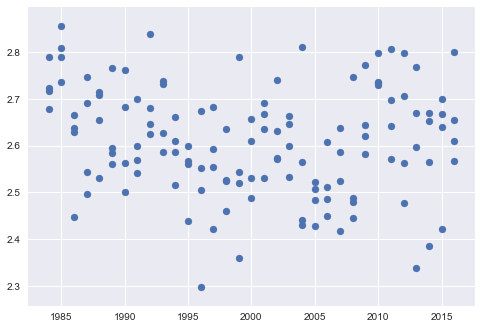

In [174]:
columns=['Years','Division',  'Goals Per Game']
gpg=pd.DataFrame(rows, columns=columns)
plt.scatter(gpg['Years'], gpg['Goals Per Game'])
plt.show()

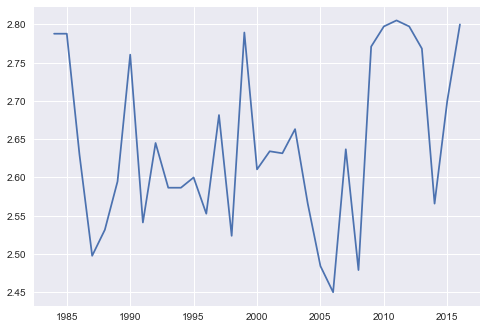

In [175]:
gpg1st=gpg[gpg['Division']==1]
plt.plot(gpg1st['Years'], gpg1st['Goals Per Game'])
plt.show()

In [176]:
gpg1st

,Years,Division,Goals Per Game
0,1984,1,2.787879
4,1985,1,2.787879
8,1986,1,2.629870
12,1987,1,2.497619
16,1988,1,2.531579
20,1989,1,2.594737
24,1990,1,2.760526
28,1991,1,2.541126
32,1992,1,2.645022
36,1993,1,2.586580


In [177]:
poissondf

poissonrows=[]
for i in range(len(poissondf)):
    Gameinfo=poissondf.iloc[i]
    HomeRow=[Gameinfo['Home'],Gameinfo['Away'],Gameinfo['Date'], Gameinfo['Year'], Gameinfo['Tier'],
             Gameinfo['HomeRating'], Gameinfo['AwayRating'], Gameinfo['Home Field'], Gameinfo['HomeRd'], Gameinfo['AwayRd'], 
             Gameinfo['pG'], Gameinfo['HomeGoals'], Gameinfo['AwayGoals'], Gameinfo['pE'], Gameinfo['TotalGoals'],
             1  ]
    AwayRow=[Gameinfo['Away'],Gameinfo['Home'],Gameinfo['Date'], Gameinfo['Year'], Gameinfo['Tier'],
             Gameinfo['AwayRating'], Gameinfo['HomeRating'], Gameinfo['Home Field'], Gameinfo['AwayRd'], Gameinfo['HomeRd'], 
             Gameinfo['pG'], Gameinfo['AwayGoals'], Gameinfo['HomeGoals'], Gameinfo['pE'], Gameinfo['TotalGoals'],
             -1  ]
    poissonrows.append(HomeRow)
    poissonrows.append(AwayRow)

In [178]:
columns=['Team', 'Opponent', 'Date', 'Year', 'Tier', 'TeamRating', 'OpponentRating', 'Home Field',
        'TeamRd', 'OpponentRd', 'pG', 'TeamGoals', 'OpponentGoals', 'pE', 'TotalGoals', 'HomeAway']
doublepoisson=pd.DataFrame(poissonrows, columns=columns)
#poissondf.to_csv('GlickoPoisson.csv')
doublepoisson.to_csv('GlickoDoublePoisson.csv')
doublepoisson

,Team,Opponent,Date,Year,Tier,TeamRating,OpponentRating,Home Field,TeamRd,OpponentRd,pG,TeamGoals,OpponentGoals,pE,TotalGoals,HomeAway
0,Grimsby Town,Barnsley,1984-08-25,1984,2,1576.248980,1532.645087,105.485656,63.333822,63.163166,0.961989,1,0,0.695425,1,1
1,Barnsley,Grimsby Town,1984-08-25,1984,2,1532.645087,1576.248980,105.485656,63.163166,63.333822,0.961989,0,1,0.695425,1,-1
2,Chester,Scunthorpe United,1984-08-25,1984,4,1258.652353,1405.298096,105.485656,62.720772,62.649051,0.962626,1,1,0.443226,2,1
3,Scunthorpe United,Chester,1984-08-25,1984,4,1405.298096,1258.652353,105.485656,62.649051,62.720772,0.962626,1,1,0.443226,2,-1
4,York City,Walsall,1984-08-25,1984,3,1483.124047,1509.002355,105.485656,62.703509,62.379983,0.962787,1,1,0.608546,2,1
5,Walsall,York City,1984-08-25,1984,3,1509.002355,1483.124047,105.485656,62.379983,62.703509,0.962787,1,1,0.608546,2,-1
6,Leicester City,Newcastle United,1984-08-25,1984,1,1626.860866,1640.286990,105.485656,63.608353,63.381269,0.961709,2,3,0.624723,5,1
7,Newcastle United,Leicester City,1984-08-25,1984,1,1640.286990,1626.860866,105.485656,63.381269,63.608353,0.961709,3,2,0.624723,5,-1
8,Huddersfield Town,Oxford United,1984-08-25,1984,2,1552.736424,1603.494531,105.485656,63.057124,62.793410,0.962355,0,3,0.575219,3,1
9,Oxford United,Huddersfield Town,1984-08-25,1984,2,1603.494531,1552.736424,105.485656,62.793410,63.057124,0.962355,3,0,0.575219,3,-1


In [ ]:
len(poissonrows[0])

In [ ]:
Gameinfo

In [ ]:
Glickologlik(best)

In [269]:
def SeasonBoost(rd, b, maxrd):
    return min(maxrd, np.sqrt(rd**2+b))

def PromotionBoost(rd, p, maxrd):
    return min(maxrd, np.sqrt(rd**2+p))

def Glickologlikboost(params):
    rows2=[]
    ratingperiodlength=7.0
    c=params['c']
    h=80
    hk=params['hk']
    b=params['b']
    #minrd=params['minrd']
    maxrd=params['maxrd']
    curtime=time.time()
    rows=len(fulldf)
    q=np.log(10)/400
    logliks=0.0
    hburn=10
    burn=25
    startyear=fulldf['Season'].values[0]
    #print(startyear)
    year=copy.deepcopy(startyear)
    startday=fulldf['Season']
    Glickodictionary=copy.deepcopy(initdictionary)
    for key in Glickodictionary:
        Glickodictionary[key][1]=maxrd
    currentyear=fulldf['Season'].values[0]
    startdate=fulldf['Date'][0]
    GameCounter=0.
    Rs=0.
    Es=0.
    totaltime=fulldf['Day#'][rows-1]-fulldf['Day#'][0]
    day=0.
    #print(Glickodictionary)
    while day<=totaltime:
        for key in Glickodictionary:
            Glickodictionary[key][1]=timeupdate(c, Glickodictionary[key][1], maxrd)
        ratingperioddf=fulldf[(fulldf['Day#'] >=day) & (fulldf['Day#']<day+ratingperiodlength)].reset_index()
        if len(ratingperioddf!=0):
            Rs=0.
            Es=0.

            for ind, row in ratingperioddf.iterrows():
                if(row['Season']!=year):
                    #print(startyear)
                    if(row['Season']>startyear+hburn):
                        newdf2=fulldf[fulldf['Season']==row['Season']]
                        for key in Glickodictionary:
                            teamdf=newdf2[newdf2['home']==key].reset_index()
                            if(len(teamdf)!=0):
                                firstgame=teamdf.iloc[0]
                                Glickodictionary[key][2]=firstgame['tier']
                            Glickodictionary[key][1]=SeasonBoost(Glickodictionary[key][1], b, maxrd)
                                #print('hi')
                #print('sup')
                Home=row['home']
                Away=row['visitor']
                HomeGoals=row['hgoal']
                AwayGoals=row['vgoal']
                year=row['Season']
                date=row['Date']
                tier=row['tier']
                Homestats=Glickodictionary[Home]
                Awaystats=Glickodictionary[Away]
                HomeRating=Homestats[0]
                AwayRating=Awaystats[0]
                HomeRd=Homestats[1]
                AwayRd=Awaystats[1]
                HomeG=g(AwayRd**2, q)
                AwayG=g(HomeRd**2, q)
                pG=g(HomeRd**2+AwayRd**2, q)
                HomeE=E(HomeRating, AwayRating, HomeG, h, 1)
                AwayE=E(AwayRating, HomeRating, AwayG, h, -1)
                pE=E(HomeRating, AwayRating, pG, h, 1)
                HRes=Res(HomeGoals, AwayGoals)
                ARes=Res(AwayGoals, HomeGoals)

                Glickodictionary[Home][4]+=HomeG*(HRes-HomeE)
                Glickodictionary[Away][4]+=AwayG*(ARes-AwayE)
                Glickodictionary[Home][3]+=insideD(HomeG, HomeE)
                Glickodictionary[Away][3]+=insideD(AwayG, AwayE)
                Rs+=HRes
                Es+=pE
                row=[Home, Away,date, year,tier, HomeRating, AwayRating, h, HomeRd, AwayRd, pG, HomeGoals, AwayGoals, HRes, pE]
                rows2.append(row)
                if(year>startyear+burn):
                    logliks+=lik(pE, HRes)
                    

            if(year>startyear+hburn):
                h+=hk*(Rs-Es)

            for key in Glickodictionary:
                Glickod=d2(q, Glickodictionary[key][3])
                Glickodictionary[key][0]=ratingupdate(Glickodictionary[key][0],q, Glickod, Glickodictionary[key][1], Glickodictionary[key][4])
                Glickodictionary[key][1]=rdupdate(Glickodictionary[key][1], Glickod)
                Glickodictionary[key][3]=0
                Glickodictionary[key][4]=0
        day+=ratingperiodlength
    print(params ,logliks,Glickodictionary['Tottenham Hotspur'][0], time.time()-curtime)
    #print(Glickodictionary)
    return -1*np.logliks

In [ ]:
best={'c': 6.611411615490053,
 'hk': 0.26568045135393087,
 'maxrd': 114.83368210171477,
     'b': 0}

In [268]:
Glickologlikboost(best)

{'b': 2224.847127553057, 'c': 0, 'hk': 0.2887933581542058, 'maxrd': 74.4747590355059, 'p': 0, 'pb': 0} -44170.0661062 1960.47245069 31.496511220932007


[['Swindon Town',
  'Wrexham',
  Timestamp('1958-08-23 00:00:00'),
  1958,
  3,
  1500,
  1500,
  80,
  74.474759035505897,
  74.474759035505897,
  0.94841795844034105,
  1,
  0,
  1,
  0.60748735587922087],
 ['Notts County',
  'Accrington Stanley',
  Timestamp('1958-08-23 00:00:00'),
  1958,
  3,
  1500,
  1500,
  80,
  74.474759035505897,
  74.474759035505897,
  0.94841795844034105,
  1,
  1,
  0.5,
  0.60748735587922087],
 ['Carlisle United',
  'Aldershot',
  Timestamp('1958-08-23 00:00:00'),
  1958,
  4,
  1500,
  1500,
  80,
  74.474759035505897,
  74.474759035505897,
  0.94841795844034105,
  1,
  0,
  1,
  0.60748735587922087],
 ['Bradford Park Avenue',
  'Workington',
  Timestamp('1958-08-23 00:00:00'),
  1958,
  4,
  1500,
  1500,
  80,
  74.474759035505897,
  74.474759035505897,
  0.94841795844034105,
  3,
  2,
  1,
  0.60748735587922087],
 ['Cardiff City',
  'Barnsley',
  Timestamp('1958-08-23 00:00:00'),
  1958,
  2,
  1500,
  1500,
  80,
  74.474759035505897,
  74.474759035

In [ ]:
from hyperopt import tpe
# Algorithm
tpe_algorithm = tpe.suggest

from hyperopt import Trials
# Trials object to track progress
bayes_trials = Trials()

from hyperopt import fmin


# Optimize
#bests=[]

space = {
        #'ratingperiodlength': hp.quniform('ratingperiodlength', 2, 30, 1),
    'c': hp.uniform('c', 0,9),
    #'h': hp.uniform('h', 50, 150),
    #get rid of this for now
        #'minrd': hp.uniform('minrd', 0, 60),
    'hk': hp.uniform('hk', .15, .4),
    'maxrd': hp.uniform('maxrd', 60,150),
    'b': hp.uniform('b', 0, 10000)
    }
from hyperopt import tpe
    # Algorithm
    
tpe_algorithm = tpe.suggest

from hyperopt import Trials
    # Trials object to track progress
bayes_trials = Trials()

from hyperopt import fmin

MAX_EVALS = 3000
best2 = fmin(fn = Glickologlikboost, space = space, algo = tpe.suggest, max_evals = MAX_EVALS, trials = bayes_trials)


In [161]:
Glickologlikboost(best2)

{'b': 2197.379482208093, 'c': 0.0003054360773678544, 'hk': 0.2752882185619584, 'maxrd': 77.77234622658803} -44170.0617253 1959.11977739 31.61164093017578


44170.061725268475

In [160]:
best2

{'b': 2197.379482208093,
 'c': 0.0003054360773678544,
 'hk': 0.2752882185619584,
 'maxrd': 77.77234622658803}

In [148]:
best={'b': 1000000000000,
 'c': 6.611411615490053,
 'hk': 0.26568045135393087,
 'maxrd': 10000000.83368210171477}

In [149]:
Glickologlikboost(best)

/Users/andrewpuopolo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in double_scalars
/Users/andrewpuopolo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in double_scalars
  import sys
/Users/andrewpuopolo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in log
/Users/andrewpuopolo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in log
/Users/andrewpuopolo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in log


{'b': 1000000000000, 'c': 6.611411615490053, 'hk': 0.26568045135393087, 'maxrd': 10000000.833682101} -inf 83883566.4122 30.023261070251465


{'AFC Bournemouth': [125221596.11842892, 16238.050931167605, 1, 0, 0],
 'AFC Wimbledon': [5922434.9100401402, 15248.104223385933, 3, 0, 0],
 'Accrington': [15008692.483891001, 15248.104363046519, 4, 0, 0],
 'Accrington Stanley': [-329112.15708054078, 2075.9412947725141, 3, 0, 0],
 'Aldershot': [64739509.293902941, 6933.8386617209144, 4, 0, 0],
 'Arsenal': [114867083.45541836, 15248.104395479821, 1, 0, 0],
 'Aston Villa': [105224859.48564832, 16664.369201407379, 2, 0, 0],
 'Barnet': [69378780.483275965, 15248.104373330487, 4, 0, 0],
 'Barnsley': [135818368.43986964, 19269.25558703332, 2, 0, 0],
 'Barrow': [355840.02638813894, 1621.7757725938663, 4, 0, 0],
 'Birmingham City': [135768238.86023375, 17965.605883297878, 2, 0, 0],
 'Blackburn Rovers': [86576452.251317769, 15809.430562002408, 2, 0, 0],
 'Blackpool': [140151815.5704211, 16437.660411822828, 4, 0, 0],
 'Bolton Wanderers': [142833193.39044717, 17147.354231394966, 3, 0, 0],
 'Boston United': [16737114.288428213, 4678.6075101452734,

In [9]:
Glickologlik(best)

NameError: name 'Glickologlik' is not defined

In [224]:
optim={{'b': 2213.3612947795027, 'hk': 0.30043717611410037, 'maxrd': 119.91864051382018, 'p': 65.27139019401217}}

{'b': 2213.3612947795027, 'hk': 0.30043717611410037, 'hp': 0} -44164.0777627 66.0 32.98163414001465


44164.077762712659

In [272]:
fulldf[fulldf['Season']>1992]['home'].unique()

array(['Liverpool', 'Mansfield Town', 'Cambridge United',
       'Colchester United', 'Cardiff City', 'Oxford United',
       'Derby County', 'Darlington', 'Barnsley', 'Walsall',
       'Hereford United', 'Hartlepool United', 'Crystal Palace', 'Chelsea',
       'Notts County', 'Charlton Athletic', 'Manchester City',
       'Stoke City', 'Sheffield United', 'Wigan Athletic', 'Southampton',
       'Barnet', 'Bury', 'Wolverhampton Wanderers', 'Wrexham', 'Burnley',
       'Bradford City', 'Brentford', 'Newcastle United', 'Carlisle United',
       'Preston North End', 'Chester', 'West Ham United', 'Bristol Rovers',
       'Oldham Athletic', 'York City', 'Huddersfield Town', 'Gillingham',
       'Leicester City', 'Arsenal', 'Luton Town', 'Plymouth Argyle',
       'Grimsby Town', 'Aston Villa', 'Southend United', 'Norwich City',
       'Tottenham Hotspur', 'Portsmouth', 'Wimbledon',
       'Peterborough United', 'Leeds United', 'Ipswich Town', 'Everton',
       'Coventry City', 'Nottingham Fo

In [8]:
Glickologlik

NameError: name 'Glickologlik' is not defined

In [14]:
#This needs to be rewritten so we don't have to run it over an dover again
for i in range(len(fulldf['home'].unique())):
    Team=fulldf['home'].unique()[i]
    Teamdf=fulldf[fulldf['home']==Team].reset_index()
    Tier=int(Teamdf['tier'][0])
    LastMatch=fulldf['Day#'][0]
    dcalc=0
    scalc=0
    initialrow=[Team,initvalues[Tier-1], Rd,Tier,  dcalc,scalc ]
    initialrows.append(initialrow)
#Needs to be rewritten to optimize using BuildEloDict Function
for a in range(len(initialrows)):
    initdictionary[initialrows[a][0]]=initialrows[a][1:]
import time

from datetime import datetime  
from datetime import timedelta
def Glickologlik(params):
    HWins=0
    HLosses=0
    HDraws=0
    rows2=[]
    ratingperiodlength=7.0
    c=params['c']
    h=80
    hk=params['hk']
    #minrd=params['minrd']
    maxrd=params['maxrd']
    curtime=time.time()
    rows=len(fulldf)
    q=np.log(10)/400
    logliks=0.0
    hburn=10
    startyear=fulldf['Season'].values[0]
    burn=1983-startyear
    startday=fulldf['Season']
    Glickodictionary=copy.deepcopy(initdictionary)
    for key in Glickodictionary:
        Glickodictionary[key][1]=maxrd
    currentyear=fulldf['Season'].values[0]
    startdate=fulldf['Date'][0]
    GameCounter=0.
    Rs=0.
    Es=0.
    totaltime=fulldf['Day#'][rows-1]-fulldf['Day#'][0]
    day=0.
    unitedrows=[]
    gamesclass=0
    correctclass=0
    #print(Glickodictionary)
    year=copy.deepcopy(startyear)
    while day<=totaltime:
        for key in Glickodictionary:
            Glickodictionary[key][1]=timeupdate(c, Glickodictionary[key][1], maxrd)
        ratingperioddf=fulldf[(fulldf['Day#'] >=day) & (fulldf['Day#']<day+ratingperiodlength)].reset_index()
        if len(ratingperioddf!=0):
            Rs=0.
            Es=0.

            for ind, row in ratingperioddf.iterrows():
                #print('sup')
                Home=row['home']
                Away=row['visitor']
                HomeGoals=row['hgoal']
                AwayGoals=row['vgoal']
                year=row['Season']
                date=row['Date']
                tier=row['tier']
                Homestats=Glickodictionary[Home]
                Awaystats=Glickodictionary[Away]
                HomeRating=Homestats[0]
                AwayRating=Awaystats[0]
                HomeRd=Homestats[1]
                AwayRd=Awaystats[1]
                HomeG=g(AwayRd**2, q)
                AwayG=g(HomeRd**2, q)
                pG=g(HomeRd**2+AwayRd**2, q)
                HomeE=E(HomeRating, AwayRating, HomeG, h, 1)
                AwayE=E(AwayRating, HomeRating, AwayG, h, -1)
                pE=E(HomeRating, AwayRating, pG, h, 1)
                HRes=Res(HomeGoals, AwayGoals)
                ARes=Res(AwayGoals, HomeGoals)

                Glickodictionary[Home][4]+=HomeG*(HRes-HomeE)
                Glickodictionary[Away][4]+=AwayG*(ARes-AwayE)
                Glickodictionary[Home][3]+=insideD(HomeG, HomeE)
                Glickodictionary[Away][3]+=insideD(AwayG, AwayE)
                Rs+=HRes
                Es+=pE
                row=[Home, Away,date, year,tier, HomeRating, AwayRating, h, HomeRd, AwayRd, pG, HomeGoals, AwayGoals, HRes, pE]
                rows2.append(row)
                if(year>startyear+burn):
                    logliks+=lik(pE, HRes)
                    if(HRes==1):
                        gamesclass+=1
                        if(pE>0.5):
                            correctclass+=1
                    if(HRes==0):
                        gamesclass+=1
                        if(pE<0.5):
                            correctclass+=1
                    
                    
                if(year>1991):
                    if(tier==1):
                        if(HRes==1):
                            HWins+=1
                        if(HRes==0.5):
                            HDraws+=1
                        if(HRes==0):
                            HLosses+=1
                    
            if(year>startyear+hburn):
                h+=hk*(Rs-Es)

            for key in Glickodictionary:
                Glickod=d2(q, Glickodictionary[key][3])
                Glickodictionary[key][0]=ratingupdate(Glickodictionary[key][0],q, Glickod, Glickodictionary[key][1], Glickodictionary[key][4])
                Glickodictionary[key][1]=rdupdate(Glickodictionary[key][1], Glickod)
                Glickodictionary[key][3]=0
                Glickodictionary[key][4]=0
            unitedrows.append([date, copy.deepcopy(Glickodictionary['Manchester United'][0]),copy.deepcopy(Glickodictionary['Manchester United'][1]) ])
        day+=ratingperiodlength
    print(params ,logliks,Glickodictionary['Tottenham Hotspur'][0], time.time()-curtime)
    #print(Glickodictionary)
    return unitedrows

In [12]:
best={'c': 6.57,'hk': .278,
'maxrd': 107.96}
Glickologlik(best)

{'c': 6.57, 'hk': 0.278, 'maxrd': 107.96} -44189.5570447 1976.21100392 23.24201226234436


[31656, 48906]

In [15]:
Unitedrows=Glickologlik(best)
Unitedrows

{'c': 6.57, 'hk': 0.278, 'maxrd': 107.96} -44189.5570447 1976.21100392 28.316731929779053


[[Timestamp('1958-08-28 00:00:00'), 1554.4876955202508, 100.02839267118728],
 [Timestamp('1958-09-04 00:00:00'), 1523.758472951863, 94.280363298138965],
 [Timestamp('1958-09-12 00:00:00'), 1529.1178319838382, 89.012513230401325],
 [Timestamp('1958-09-18 00:00:00'), 1549.6823237366577, 84.340157748982165],
 [Timestamp('1958-09-25 00:00:00'), 1540.6896419199877, 82.833982514136068],
 [Timestamp('1958-10-02 00:00:00'), 1539.1638916115569, 80.972207095386096],
 [Timestamp('1958-10-09 00:00:00'), 1505.3010573670826, 77.475013804007972],
 [Timestamp('1958-10-17 00:00:00'), 1503.1641562245718, 76.014485114505646],
 [Timestamp('1958-10-22 00:00:00'), 1488.0273649083229, 74.623910724889882],
 [Timestamp('1958-10-31 00:00:00'), 1471.3782783394665, 73.338035058199154],
 [Timestamp('1958-11-01 00:00:00'), 1488.8813667311274, 72.174454319005235],
 [Timestamp('1958-11-08 00:00:00'), 1471.2121810280048, 71.108897006202497],
 [Timestamp('1958-11-15 00:00:00'), 1462.8667015112608, 70.235266129756397],


In [24]:
columns=['TimeStamp', 'Rating', 'Rd']
Uniteddf=pd.DataFrame(Unitedrows,columns=columns)
Uniteddf['CalendarYear']=Uniteddf['TimeStamp'].dt.year

United2014=Uniteddf[Uniteddf['CalendarYear']==2014].reset_index()
plt.plot(United2014['TimeStamp'], United2014['Rd'])
plt.xlabel('Time')
plt.ylabel('Rating Deviation')
plt.axvline(x='2014-05-11',  linestyle='--', color='black')
plt.axvline(x='2014-08-08', linestyle='--', color='black')
plt.title('Manchester United Rating Deviation In 2014', fontsize=16)
#plt.show()
plt.savefig('UnitedVanilla.png')

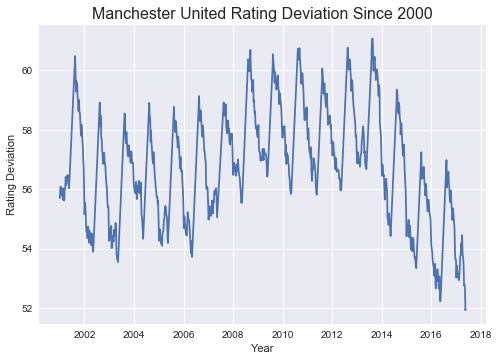

In [27]:
United2000=Uniteddf[Uniteddf['CalendarYear']>2000].reset_index()
plt.plot(United2000['TimeStamp'], United2000['Rd'])
plt.xlabel('Year')
plt.ylabel('Rating Deviation')
plt.title('Manchester United Rating Deviation Since 2000', fontsize=16)
plt.show()
#plt.savefig('UnitedSince2000.png')


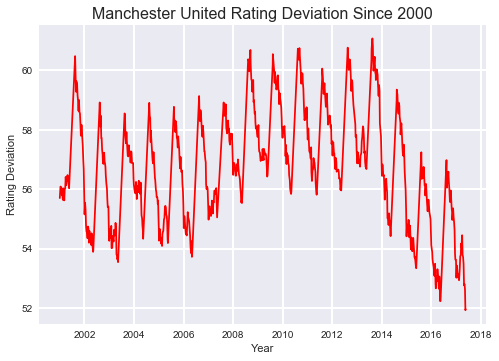

In [28]:
plt.plot(United2000['TimeStamp'], United2000['Rd'], color='red')
plt.grid(color='w', linestyle='-', linewidth=2)
plt.xlabel('Year')
plt.ylabel('Rating Deviation')
plt.title('Manchester United Rating Deviation Since 2000', fontsize=16)

plt.show()
#plt.savefig('UnitedSince2000.png')

In [29]:
UniteddfPl=Uniteddf[Uniteddf['CalendarYear']>1991].reset_index()
del UniteddfPl['index']
UniteddfPl

,TimeStamp,Rating,Rd,CalendarYear
0,1992-01-01,1841.015327,52.036759,1992
1,1992-01-08,1841.015327,52.449866,1992
2,1992-01-17,1845.444856,52.381587,1992
3,1992-01-24,1846.960475,51.832637,1992
4,1992-01-31,1846.960475,52.247358,1992
5,1992-02-07,1848.651570,52.108183,1992
6,1992-02-12,1845.083667,52.067729,1992
7,1992-02-21,1845.083667,52.480592,1992
8,1992-02-28,1845.987014,51.955729,1992
9,1992-03-06,1844.835323,51.812980,1992


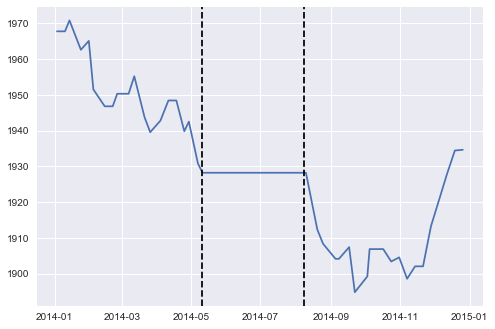

In [30]:
plt.plot(United2014['TimeStamp'], United2014['Rating'])
plt.axvline(x='2014-05-11',  linestyle='--', color='black')
plt.axvline(x='2014-08-08', linestyle='--', color='black')
plt.show()

In [162]:
#United2014.to_csv('UnitedVanilla2014.csv')

In [70]:
Glickologlik(best)

{'c': 6.57, 'hk': 0.278, 'maxrd': 107.96} -44189.5570447 1976.21100392 25.44882297515869


[4502, 2577, 2667]

In [73]:
wins=4502
draws=2577
losses=2667
sums=wins+draws+losses

In [74]:
wins/sums

0.46193310075928584

In [32]:
United2014

,index,TimeStamp,Rating,Rd,CalendarYear
0,2189,2014-01-03,1967.755453,56.449008,2014
1,2190,2014-01-10,1967.755453,56.830048,2014
2,2191,2014-01-14,1970.811645,56.793654,2014
3,2192,2014-01-24,1962.600128,56.441444,2014
4,2193,2014-01-31,1965.084907,56.475606,2014
5,2194,2014-02-04,1951.504322,56.315101,2014
6,2195,2014-02-14,1946.780958,55.648151,2014
7,2196,2014-02-21,1946.780958,56.034638,2014
8,2197,2014-02-25,1950.292948,55.965456,2014
9,2198,2014-03-07,1950.292948,56.349767,2014


In [33]:
fig, ax = plt.subplots(1,1,figsize=(8,5))
ax.plot(United2014['Date'].values,United2014['Rating'], color='red')
ax.fill_between(United2014['Date'].values, United2014['Rating']-United2014['Rd'],United2014['Rating']+United2014['Rd'], facecolor='red', alpha=.05)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.title('Basic Glicko Estimate For Manchester United Rating in 2014', fontsize=16)
plt.axvline(x='2014-05-11',  linestyle='--', color='black')
plt.axvline(x='2014-08-08', linestyle='--', color='black')
#plt.savefig('UnitedBasicRating.png')
plt.show()




KeyError: 'Date'

In [141]:
United2014['Date'][0]

datetime.date(2014, 1, 4)